In [65]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas 
from shapely.geometry import Point

from sklearn.impute import SimpleImputer

from datetime import timedelta
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_column',500)
pd.set_option('display.max_row',500)

In [5]:
df = pd.read_csv('olist_data.csv')
df.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_time,order_estimated_time,difference_time_delivery,review_score,review_creation_date,review_answer_timestamp,review_reaction_time,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name_english,customer_unique_id,customer_city,customer_state
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,1.0,credit_card,1.0,18.12,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,3.0,voucher,1.0,2.00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,2.0,voucher,1.0,18.59,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,5.355729,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,0.776273,1.0,boleto,1.0,141.46,2018-07-30 03:24:27,118.70,22.76,400.0,19.0,13.0,19.0,4693.0,perfumery,af07308b275d755c9edb36a90c618231,barreiras,BA
4,4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,17.245498,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,4.797199,1.0,credit_card,3.0,179.12,2018-08-13 08:55:23,159.90,19.22,420.0,24.0,19.0,21.0,9576.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO


In [6]:
# delete Unnamed:0 column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_delivered_time,order_estimated_time,difference_time_delivery,review_score,review_creation_date,review_answer_timestamp,review_reaction_time,payment_sequential,payment_type,payment_installments,payment_value,shipping_limit_date,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume_cm3,product_category_name_english,customer_unique_id,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,1.0,credit_card,1.0,18.12,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,3.0,voucher,1.0,2.00,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.429144,15.536632,7.107488,4.0,2017-10-11 00:00:00,2017-10-12 03:43:48,1.155417,2.0,voucher,1.0,18.59,2017-10-06 11:07:15,29.99,8.72,500.0,19.0,8.0,13.0,1976.0,housewares,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12.502292,17.858021,5.355729,4.0,2018-08-08 00:00:00,2018-08-08 18:37:50,0.776273,1.0,boleto,1.0,141.46,2018-07-30 03:24:27,118.70,22.76,400.0,19.0,13.0,19.0,4693.0,perfumery,af07308b275d755c9edb36a90c618231,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.382708,26.628206,17.245498,5.0,2018-08-18 00:00:00,2018-08-22 19:07:58,4.797199,1.0,credit_card,3.0,179.12,2018-08-13 08:55:23,159.90,19.22,420.0,24.0,19.0,21.0,9576.0,auto,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117741 entries, 0 to 117740
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117741 non-null  object 
 1   customer_id                    117741 non-null  object 
 2   order_status                   117741 non-null  object 
 3   order_purchase_timestamp       117741 non-null  object 
 4   order_approved_at              117741 non-null  object 
 5   order_delivered_carrier_date   117741 non-null  object 
 6   order_delivered_customer_date  117741 non-null  object 
 7   order_estimated_delivery_date  117741 non-null  object 
 8   order_delivered_time           117741 non-null  float64
 9   order_estimated_time           117741 non-null  float64
 10  difference_time_delivery       117741 non-null  float64
 11  review_score                   117741 non-null  float64
 12  review_creation_date          

In [9]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

## RFM

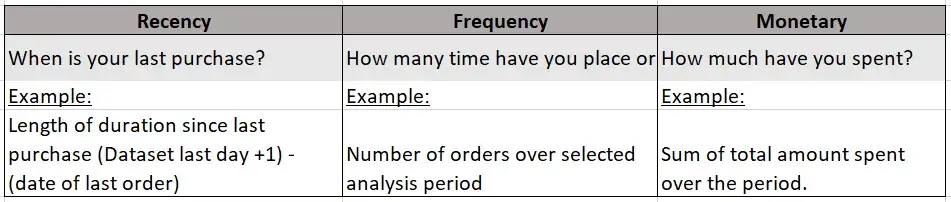

In [7]:
from IPython.display import Image
Image(filename='D:/pierr/Documents/images/rfm_pandas.png',width=800,height=600)

In [8]:
rec_end = max(df['order_approved_at']) + dt.timedelta(days=1)
rfm_df = df.groupby('customer_id').agg({'order_approved_at': lambda x: (rec_end-max(x)).days,
                                       'order_id': 'count',
                                       'payment_value': 'sum'})
rfm_df.columns = ['Recency', 'Frequency', 'Monetary']

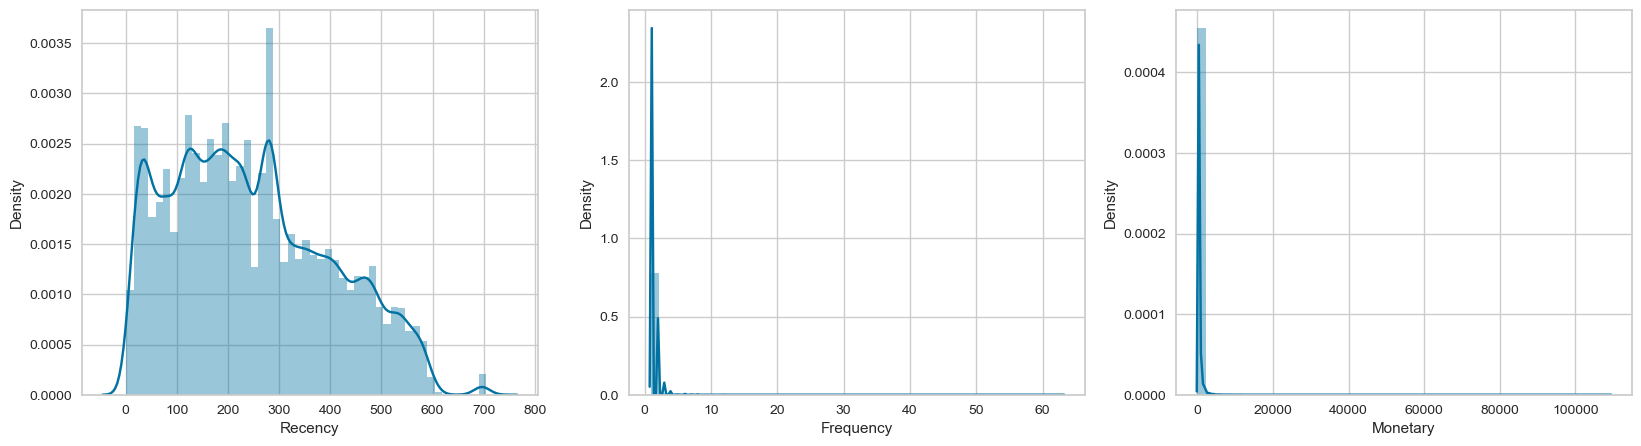

In [9]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
for i, feature in enumerate(list(rfm_df.columns)):
    sns.distplot(rfm_df[feature], ax = axes[i])

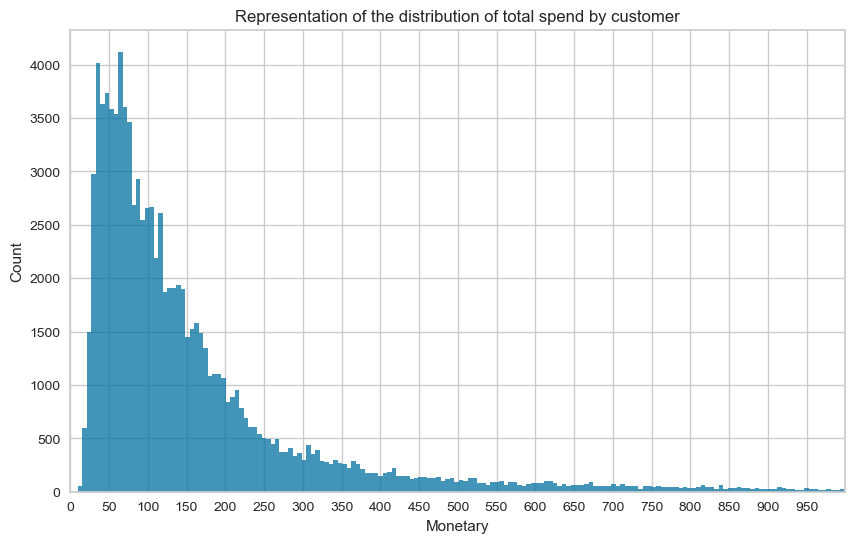

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(rfm_df['Monetary'])
plt.xlim([0,1000])
plt.xticks(np.arange(0,1000,50))
plt.title('Representation of the distribution of total spend by customer');

In [11]:
rfm_df['Frequency'].value_counts()

1     85348
2      9777
3      1553
4       828
6       277
5       242
7        47
8        40
12       21
10       16
9        12
11       11
15        6
24        5
14        5
13        4
20        3
21        3
16        2
22        2
29        1
38        1
26        1
63        1
19        1
Name: Frequency, dtype: int64

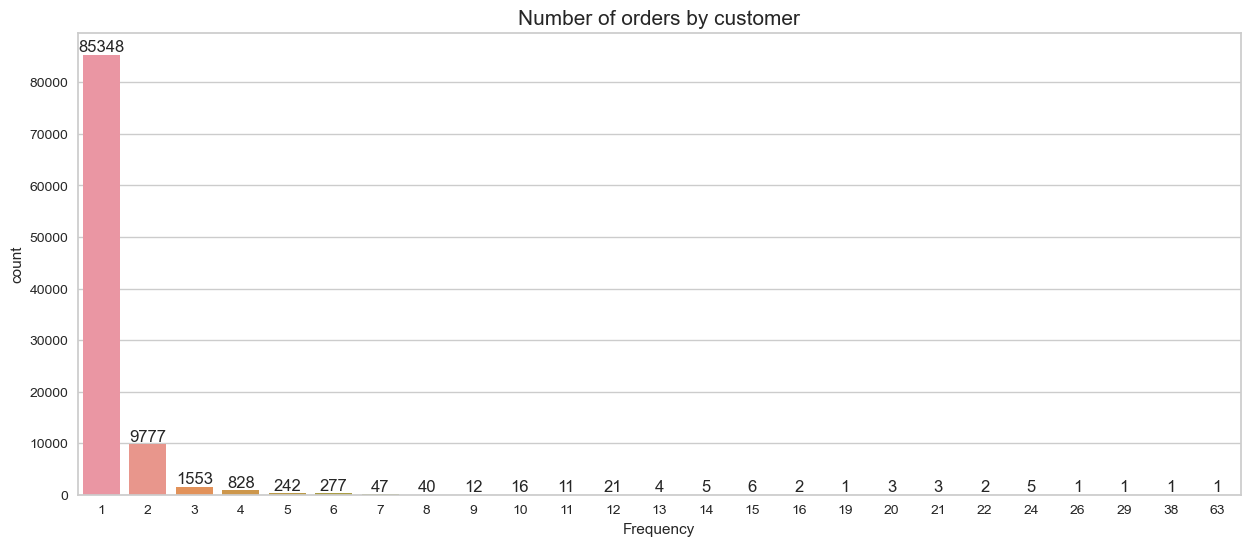

In [12]:
plt.figure(figsize=(15,6))
ax = sns.countplot(rfm_df['Frequency'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of orders by customer',fontsize = 15)
plt.show()

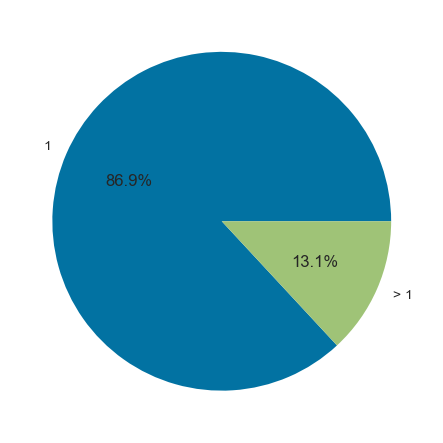

In [13]:
pourcentage = rfm_df['Frequency'].value_counts()[1]/len(rfm_df)
x = [pourcentage, 1 - pourcentage]
plt.pie(x, labels=["1", "> 1"], autopct='%1.1f%%')
plt.show()

In [33]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,98207.000000,98207.000000,98207.000000
mean,245.753429,0.761611,4.790948
std,153.248796,0.198535,0.900450
min,1.000000,0.693147,2.359910
25%,122.000000,0.693147,4.157554
50%,227.000000,0.693147,4.712229
75%,355.000000,0.693147,5.285131
max,719.000000,4.158883,11.601976


In [33]:
scaler = MinMaxScaler()
rfm_normalized = pd.DataFrame(scaler.fit_transform(rfm_df))
rfm_normalized.columns = ['n_Recency', 'n_Frequency', 'n_Monetary']
rfm_normalized.describe()

,n_Recency,n_Frequency,n_Monetary
count,98207.000000,98207.000000,98207.000000
mean,0.340882,0.003208,0.001800
std,0.213438,0.012126,0.005693
min,0.000000,0.000000,0.000000
25%,0.168524,0.000000,0.000488
50%,0.314763,0.000000,0.000921
75%,0.493036,0.000000,0.001709
max,1.000000,1.000000,1.000000


In [81]:
rfm_normalized.head()

,n_Recency,n_Frequency,n_Monetary
0,0.408078,0.0,0.000962
1,0.576602,0.0,0.000529
2,0.768802,0.0,0.001700
3,0.532033,0.0,0.001553
4,0.211699,0.0,0.000891


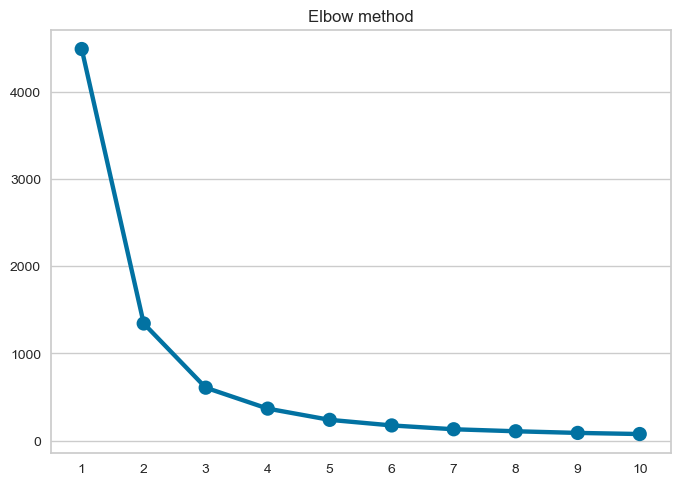

In [84]:
SSE = []
for k in range(0, 10):
    kmeans = KMeans(n_clusters = k+1, random_state = 0).fit(rfm_normalized)
    SSE.append(kmeans.inertia_)

sns.pointplot(x = list(range(1,11)), y = SSE)
plt.title('Elbow method')
plt.show()

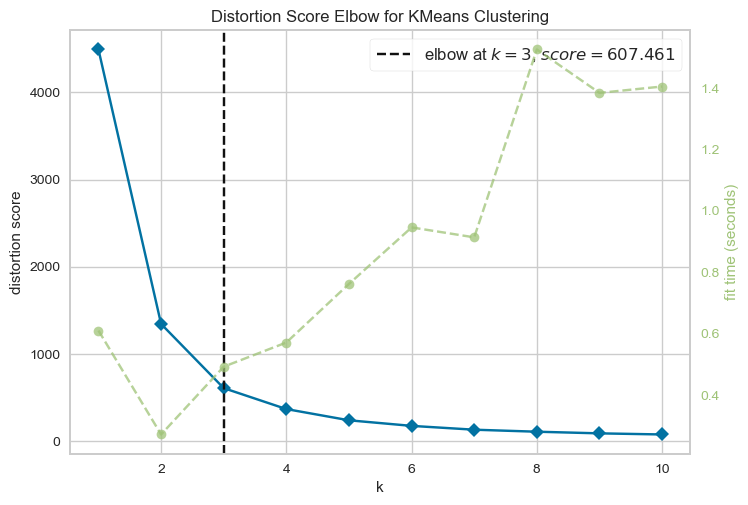

In [87]:
model = KMeans(random_state=0)

elb_visualizer = KElbowVisualizer(model, k=(1,11))
elb_visualizer.fit(rfm_normalized)    
elb_visualizer.show();

In [36]:
cluster = [ 3, 4, 5 ]
for i in cluster:
    KMean = KMeans(n_clusters = i)
    KMean.fit(rfm_normalized)
    label  =KMean.predict(rfm_normalized)
    print(f'Silhouette Score(n={i}): {silhouette_score(rfm_normalized, label)}')

Silhouette Score(n=3): 0.5697363402981803
Silhouette Score(n=4): 0.5462826018152382
Silhouette Score(n=5): 0.545729734868516


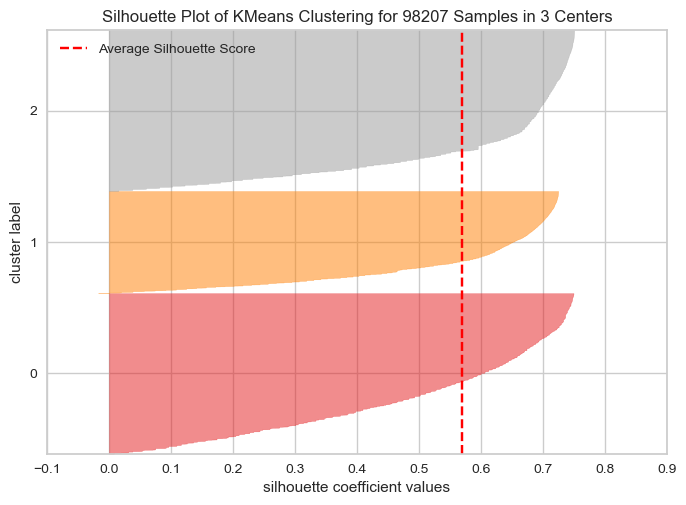

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [37]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 0))
visualizer.fit(rfm_normalized)
visualizer.show()

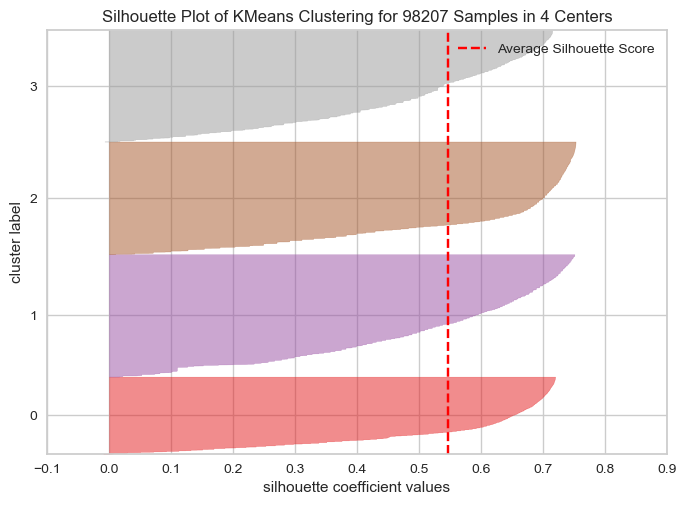

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 0))
visualizer.fit(rfm_normalized)
visualizer.show()

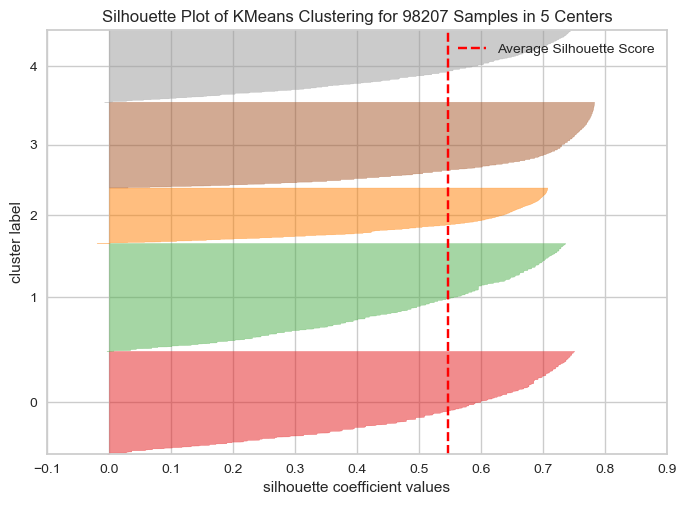

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [39]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 0))
visualizer.fit(rfm_normalized)
visualizer.show()

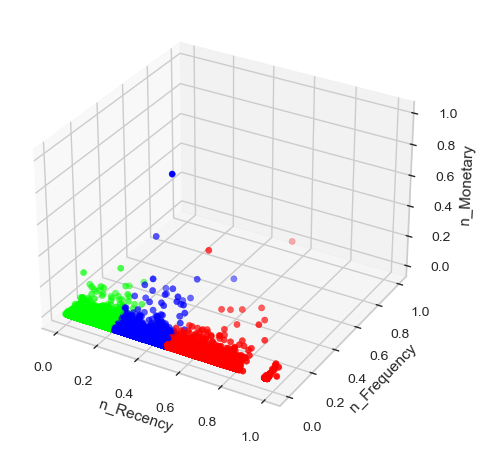

In [40]:
model = KMeans(n_clusters = 3, random_state = 0).fit(rfm_normalized)
centers = model.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(rfm_normalized['n_Recency'], rfm_normalized['n_Frequency'], rfm_normalized['n_Monetary'],
          cmap = 'brg', c = model.predict(rfm_normalized))
plt.xlabel('n_Recency')
plt.ylabel('n_Frequency')
ax.set_zlabel('n_Monetary')
ax.scatter(centers[:, 0], centers[:, 1], c = 'black');

In [ ]:
rfm_ = pd.DataFrame(scaler.inverse_transform(rfm_normalized))
rfm_.columns = rfm_df.columns
rfm_['Customer Id'] = rfm_df.index
rfm_['Cluster'] = model.labels_

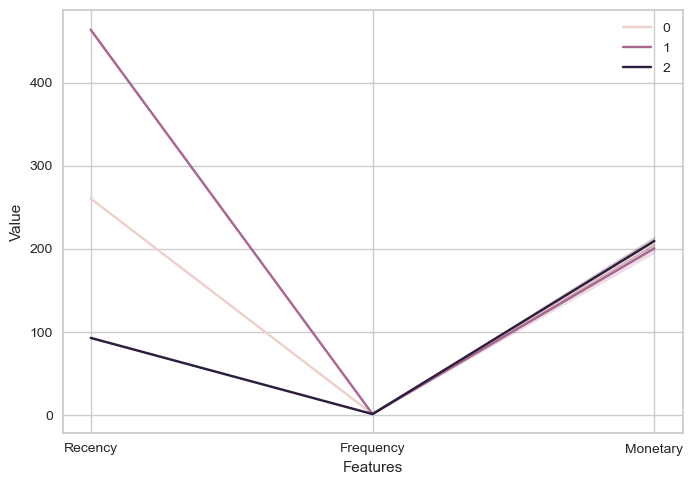

In [47]:
melted_rfm_ = pd.melt(rfm_.reset_index(),
                               id_vars = ['Customer Id', 'Cluster'],
                               value_vars = ['Recency','Frequency','Monetary'],
                               var_name = 'Features',
                               value_name = 'Value')

sns.lineplot('Features','Value',hue ='Cluster', data = melted_rfm_)
plt.legend();

In [31]:
rfm_.head()

,Recency,Frequency,Monetary,Customer Id,Cluster
0,294.0,1.0,114.74,00012a2ce6f8dcda20d059ce98491703,1
1,415.0,1.0,67.41,000161a058600d5901f007fab4c27140,1
2,553.0,1.0,195.42,0001fd6190edaaf884bcaf3d49edf079,1
3,383.0,1.0,179.35,0002414f95344307404f0ace7a26f1d5,1
4,153.0,1.0,107.01,000379cdec625522490c315e70c7a9fb,0


In [51]:
rfm_.groupby('Cluster').agg({
    'Recency':['mean','median','min','max'],
    'Frequency':['mean','median','min','max'],
    'Monetary':['mean','median','min','max','count']
})

Recency                      Frequency                    \
               mean median    min    max      mean median  min   max   
Cluster                                                                
0        260.438291  263.0  177.0  361.0  1.201338    1.0  1.0  38.0   
1        463.407844  456.0  362.0  719.0  1.213948    1.0  1.0  63.0   
2         92.821390   94.0    1.0  176.0  1.186923    1.0  1.0  24.0   

           Monetary                                   
               mean  median    min        max  count  
Cluster                                               
0        206.991783  108.77  10.07  109312.64  37231  
1        200.581208  107.27  11.62   45256.00  23688  
2        209.377125  113.03   9.59   30186.00  37288

In [52]:
rfm_.head()

,Recency,Frequency,Monetary,Customer Id,Cluster
0,294.0,1.0,114.74,00012a2ce6f8dcda20d059ce98491703,0
1,415.0,1.0,67.41,000161a058600d5901f007fab4c27140,1
2,553.0,1.0,195.42,0001fd6190edaaf884bcaf3d49edf079,1
3,383.0,1.0,179.35,0002414f95344307404f0ace7a26f1d5,1
4,153.0,1.0,107.01,000379cdec625522490c315e70c7a9fb,2


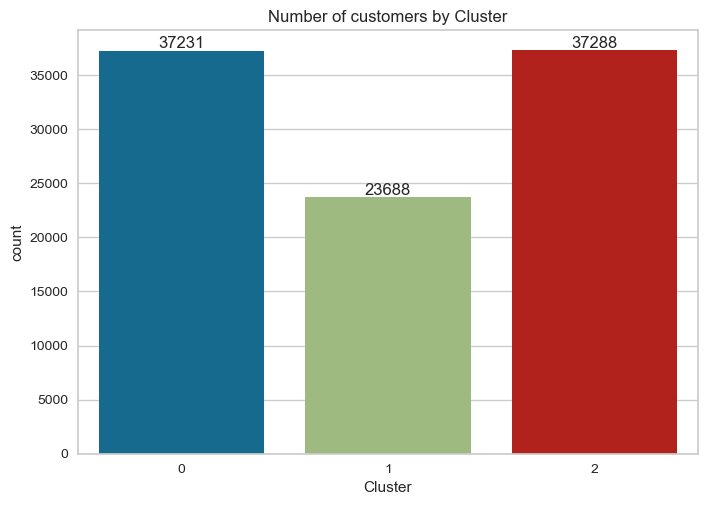

In [53]:
ax = sns.countplot(rfm_['Cluster'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Number of customers by Cluster')
plt.show()

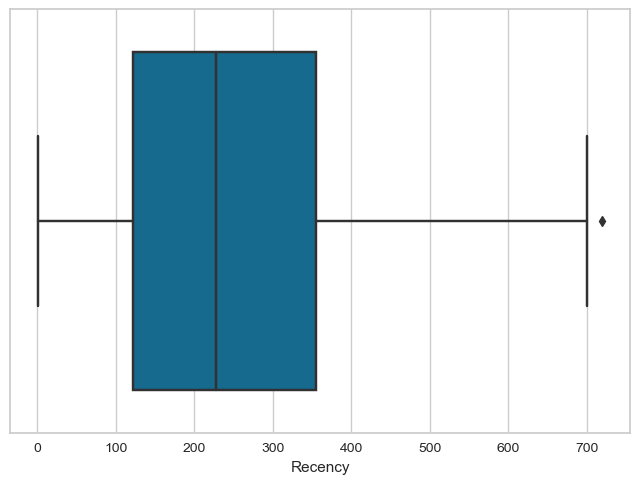

In [54]:
sns.boxplot(rfm_['Recency']);

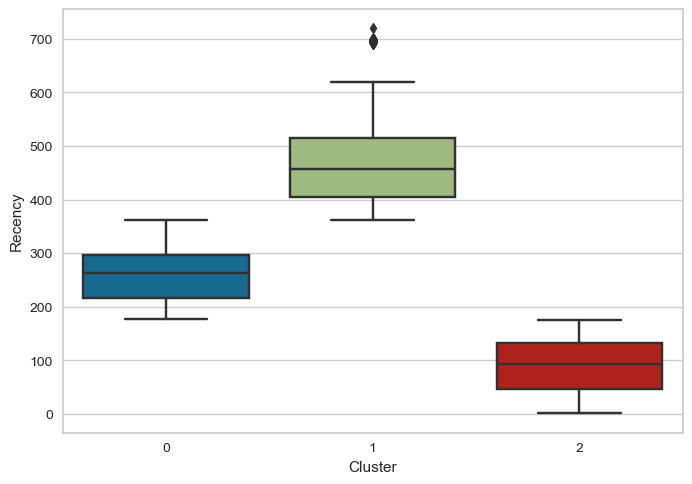

In [55]:
sns.boxplot(x  ='Cluster', y = 'Recency', data = rfm_);

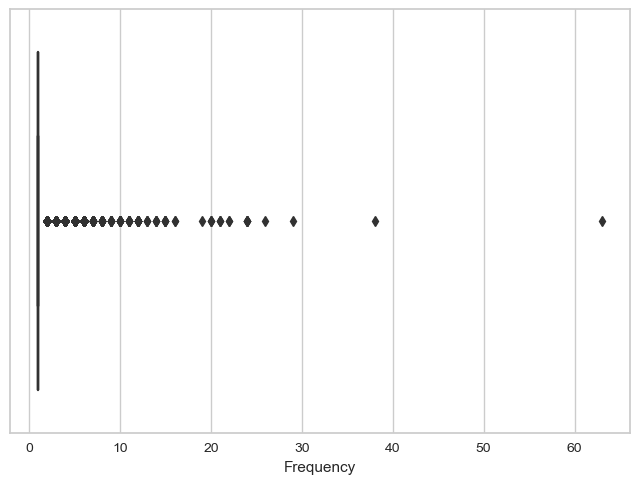

In [56]:
sns.boxplot(rfm_['Frequency']);

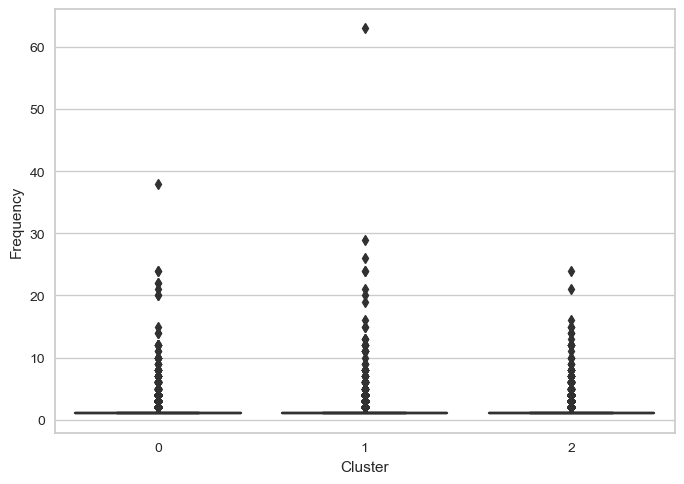

In [57]:
sns.boxplot(x  ='Cluster', y = 'Frequency', data = rfm_);

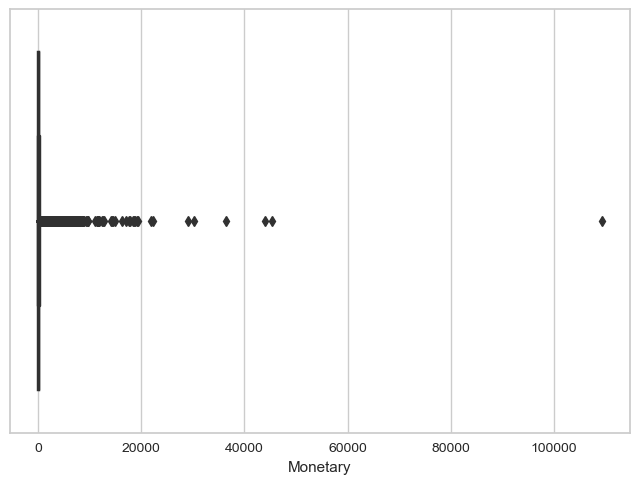

In [58]:
sns.boxplot(rfm_['Monetary']);

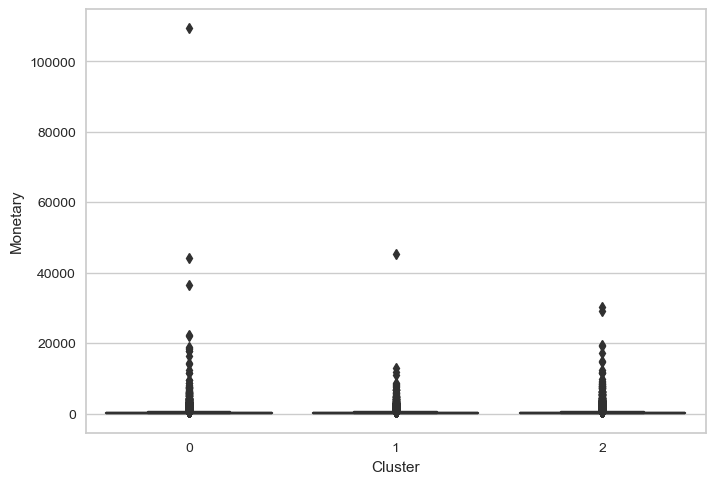

In [59]:
sns.boxplot(x  ='Cluster', y = 'Monetary', data = rfm_);

## RFM + Review


In [60]:
rfm_review_df = df.groupby('customer_id').agg({'order_approved_at': lambda x: (rec_end-max(x)).days,
                                       'order_id': 'count',
                                       'payment_value': 'sum',
                                       'review_score': 'mean'})
rfm_review_df.columns = ['Recency', 'Frequency', 'Monetary','Review']

In [61]:
rfm_review_df.head()

,Recency,Frequency,Monetary,Review
customer_id,,,,
00012a2ce6f8dcda20d059ce98491703,294,1,114.74,1.0
000161a058600d5901f007fab4c27140,415,1,67.41,4.0
0001fd6190edaaf884bcaf3d49edf079,553,1,195.42,5.0
0002414f95344307404f0ace7a26f1d5,383,1,179.35,5.0
000379cdec625522490c315e70c7a9fb,153,1,107.01,4.0


In [62]:
scaler = MinMaxScaler()
rfm_review_normalized = pd.DataFrame(scaler.fit_transform(rfm_review_df))
rfm_review_normalized.columns = ['n_Recency', 'n_Frequency', 'n_Monetary','n_Review']
rfm_review_normalized.describe()

,n_Recency,n_Frequency,n_Monetary,n_Review
count,98207.000000,98207.000000,98207.000000,98207.000000
mean,0.340882,0.003208,0.001800,0.780799
std,0.213438,0.012126,0.005693,0.329272
min,0.000000,0.000000,0.000000,0.000000
25%,0.168524,0.000000,0.000488,0.750000
50%,0.314763,0.000000,0.000921,1.000000
75%,0.493036,0.000000,0.001709,1.000000
max,1.000000,1.000000,1.000000,1.000000


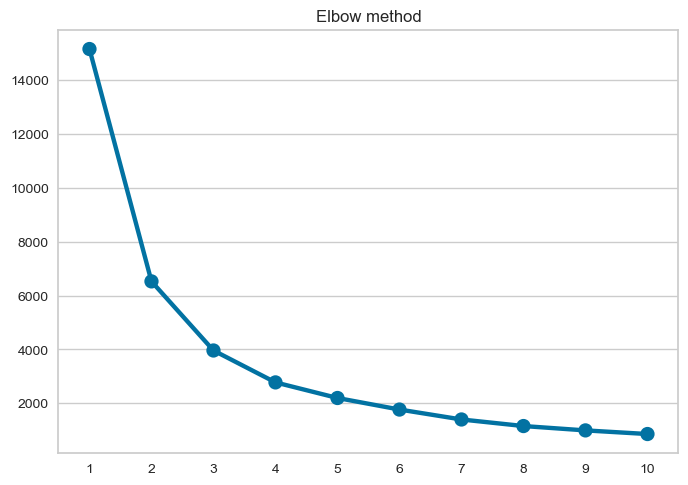

In [88]:
SSE = []
for k in range(0, 10):
    kmeans = KMeans(n_clusters = k+1, random_state = 0).fit(rfm_review_normalized)
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x = list(range(1,11)), y = SSE)
plt.title('Elbow method')
plt.show()

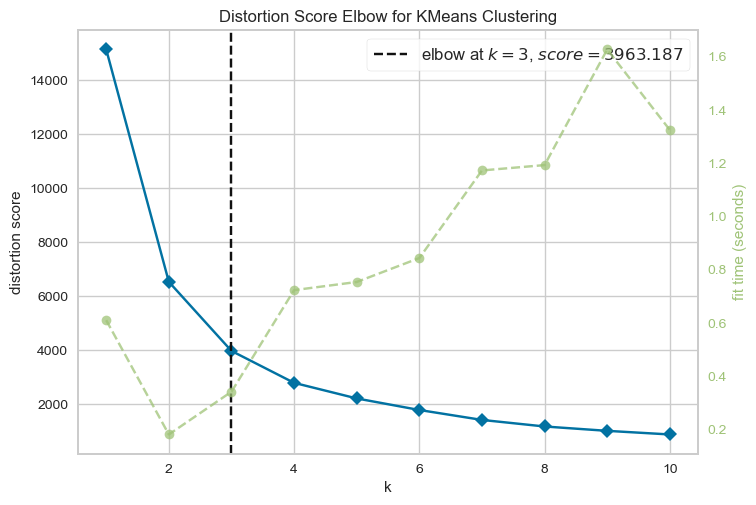

In [89]:
model = KMeans(random_state=0)

elb_visualizer = KElbowVisualizer(model, k=(1,11))
elb_visualizer.fit(rfm_review_normalized)    
elb_visualizer.show();

In [64]:
cluster = [ 3, 4, 5 ]
for i in cluster:
    KMean = KMeans(n_clusters = i)
    KMean.fit(rfm_review_normalized)
    label = KMean.predict(rfm_review_normalized)
    print(f'Silhouette Score(n={i}): {silhouette_score(rfm_review_normalized, label)}')

Silhouette Score(n=3): 0.47024679493874816
Silhouette Score(n=4): 0.49440507130385886
Silhouette Score(n=5): 0.5048716809920321


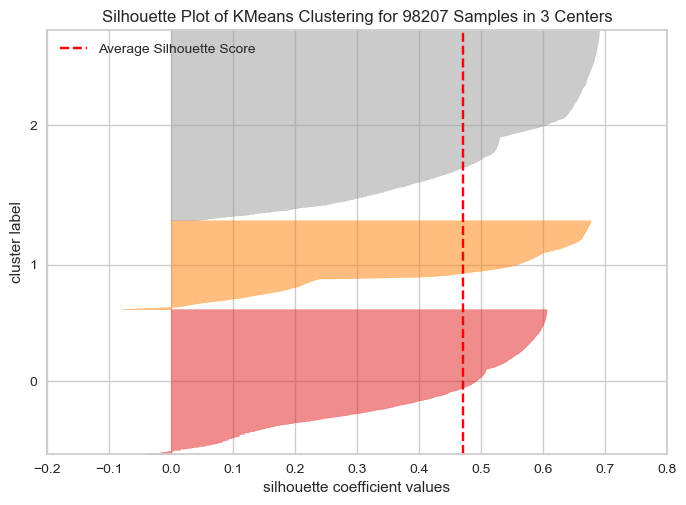

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 0))
visualizer.fit(rfm_review_normalized)
visualizer.show()

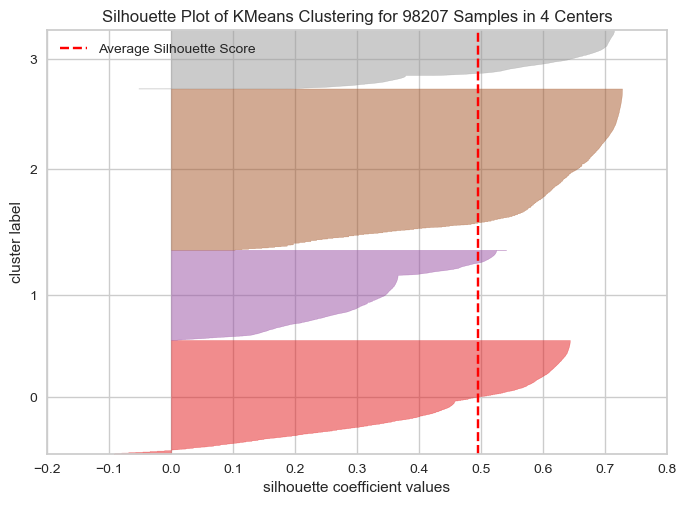

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [66]:
visualizer = SilhouetteVisualizer(KMeans(4, random_state = 0))
visualizer.fit(rfm_review_normalized)
visualizer.show()

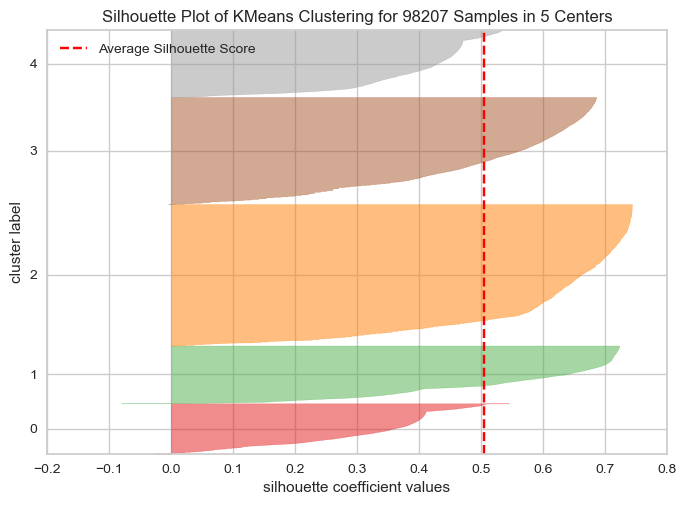

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 0))
visualizer.fit(rfm_review_normalized)
visualizer.show()

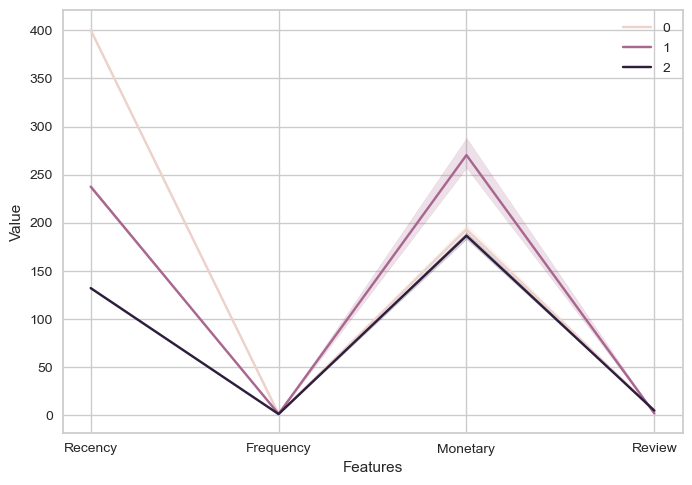

In [90]:
model = KMeans(n_clusters = 3, random_state = 0).fit(rfm_review_normalized)
rfm_review_ = pd.DataFrame(scaler.inverse_transform(rfm_review_normalized))
rfm_review_.columns = rfm_review_df.columns
rfm_review_['Customer Id'] = rfm_review_df.index
rfm_review_['Cluster'] = model.labels_

melted_rfm_review_normalized = pd.melt(rfm_review_.reset_index(),
                               id_vars = ['Customer Id', 'Cluster'],
                               value_vars = ['Recency','Frequency','Monetary','Review'],
                               var_name = 'Features',
                               value_name = 'Value')

sns.lineplot('Features','Value',hue ='Cluster', data = melted_rfm_review_normalized)
plt.legend();

In [91]:
rfm_review_.groupby('Cluster').agg({
    'Recency':['mean','median','min','max'],
    'Frequency':['mean','median','min','max'],
    'Monetary':['mean','median','min','max'],
    'Review':['mean','median','min','max','count']
})

Recency                      Frequency                    \
               mean median    min    max      mean median  min   max   
Cluster                                                                
0        400.297276  389.0  258.0  700.0  1.185824    1.0  1.0  63.0   
1        237.506308  218.0    1.0  719.0  1.318032    1.0  1.0  29.0   
2        132.079768  131.0    6.0  268.0  1.153160    1.0  1.0  24.0   

           Monetary                               Review                   \
               mean   median    min        max      mean median       min   
Cluster                                                                     
0        193.071385  106.160  10.07   45256.00  4.688190    5.0  3.000000   
1        270.319562  123.135  10.89  109312.64  1.838485    1.0  1.000000   
2        186.542982  107.990   9.59   30186.00  4.761703    5.0  3.333333   

                     
         max  count  
Cluster              
0        5.0  33521  
1        3.0  20608  
2        5.0  44078

In [92]:
rfm_review_.head()

,Recency,Frequency,Monetary,Review,Customer Id,Cluster
0,294.0,1.0,114.74,1.0,00012a2ce6f8dcda20d059ce98491703,1
1,415.0,1.0,67.41,4.0,000161a058600d5901f007fab4c27140,0
2,553.0,1.0,195.42,5.0,0001fd6190edaaf884bcaf3d49edf079,0
3,383.0,1.0,179.35,5.0,0002414f95344307404f0ace7a26f1d5,0
4,153.0,1.0,107.01,4.0,000379cdec625522490c315e70c7a9fb,2


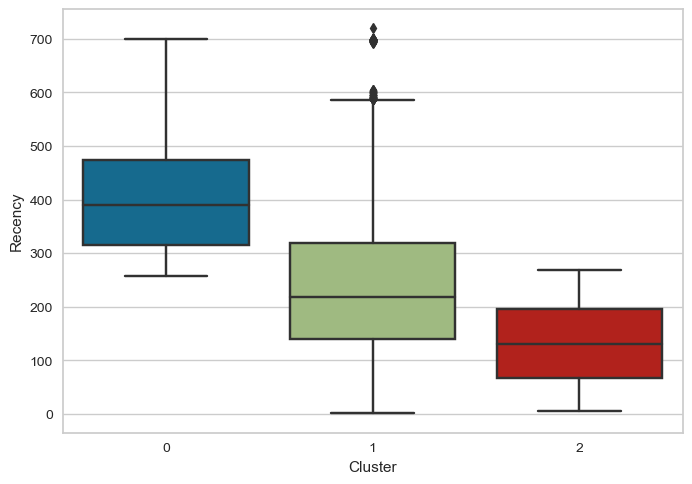

In [93]:
sns.boxplot(x  ='Cluster', y = 'Recency', data = rfm_review_);

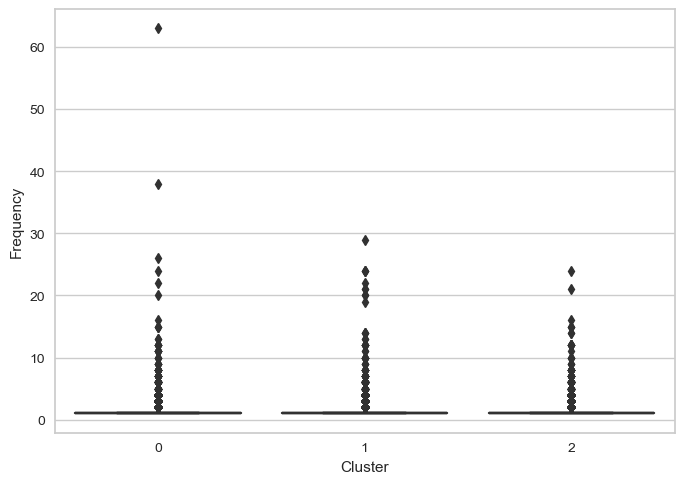

In [94]:
sns.boxplot(x  ='Cluster', y = 'Frequency', data = rfm_review_);

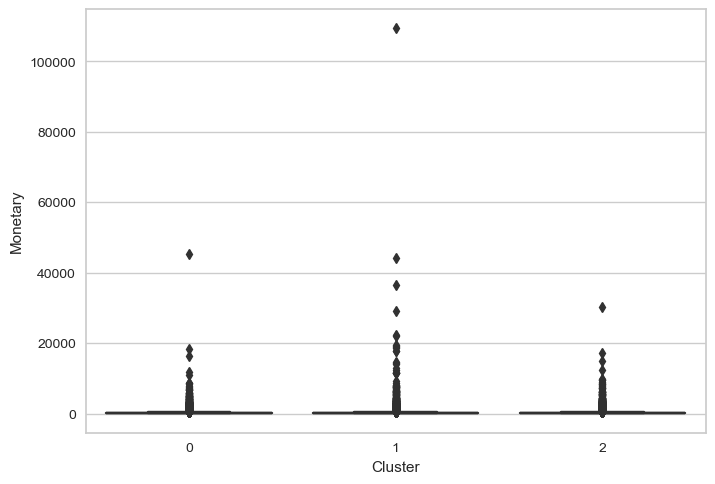

In [95]:
sns.boxplot(x  ='Cluster', y = 'Monetary', data = rfm_review_);

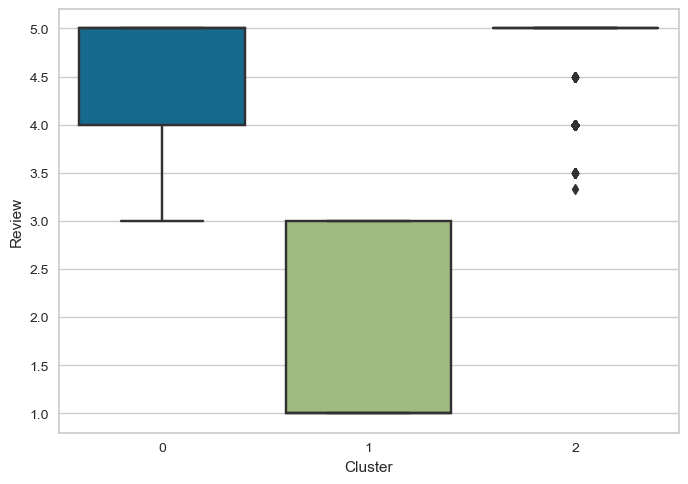

In [96]:
sns.boxplot(x  ='Cluster', y = 'Review', data = rfm_review_);

## RFM ++

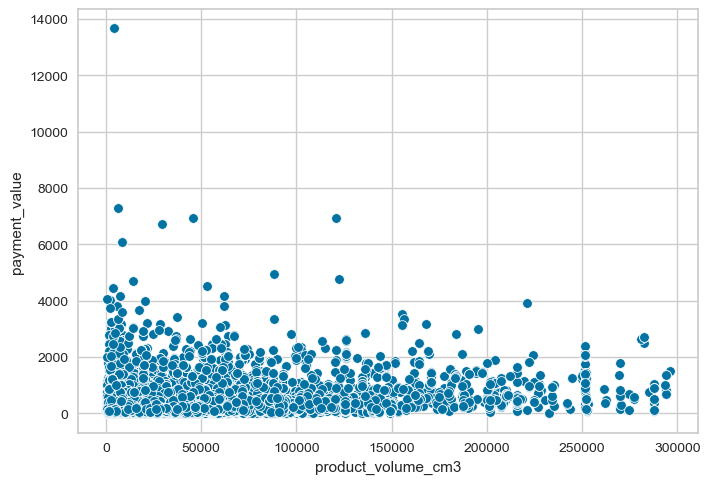

In [97]:
sns.scatterplot(df['product_volume_cm3'],df['payment_value']);

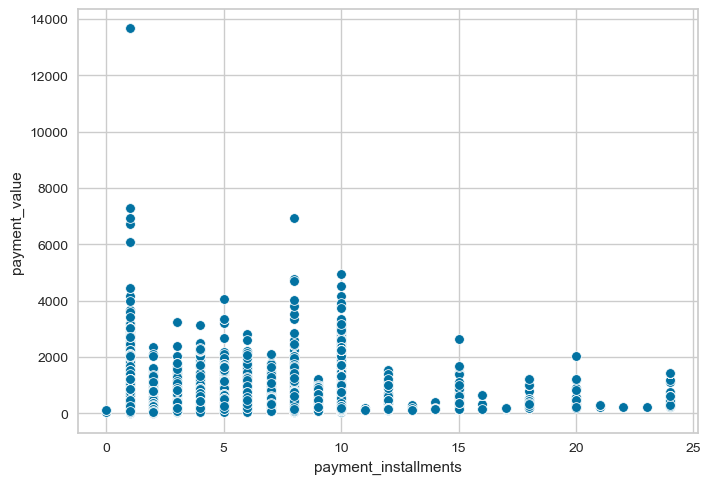

In [98]:
sns.scatterplot(df['payment_installments'],df['payment_value']);

In [10]:
rec_end = max(df['order_approved_at']) + dt.timedelta(days=1)
rfm_plus_df = df.groupby('customer_id').agg({'order_approved_at': lambda x: (rec_end-max(x)).days,
                                       'order_id': 'count',
                                       'payment_value': 'sum',
                                       'review_score': 'mean',
                                       'payment_installments': 'mean'})

rfm_plus_df.columns = ['Recency', 'Frequency', 'Monetary','Review','Installments']

In [283]:
rfm_plus_df.head()

,Recency,Frequency,Monetary,Review,Installments
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,294,1,114.74,1.0,8.0
000161a058600d5901f007fab4c27140,415,1,67.41,4.0,5.0
0001fd6190edaaf884bcaf3d49edf079,553,1,195.42,5.0,10.0
0002414f95344307404f0ace7a26f1d5,383,1,179.35,5.0,1.0
000379cdec625522490c315e70c7a9fb,153,1,107.01,4.0,1.0


0.4315779727393262


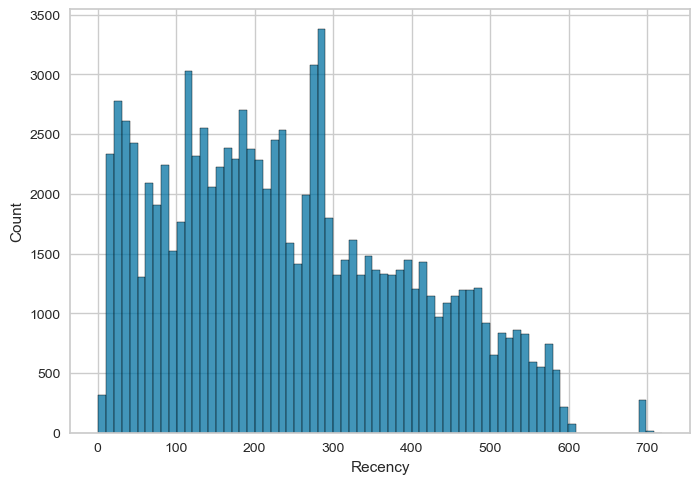

In [96]:
sns.histplot(rfm_plus_df['Recency']);
print(rfm_plus_df['Recency'].skew())

-1.065891040243438


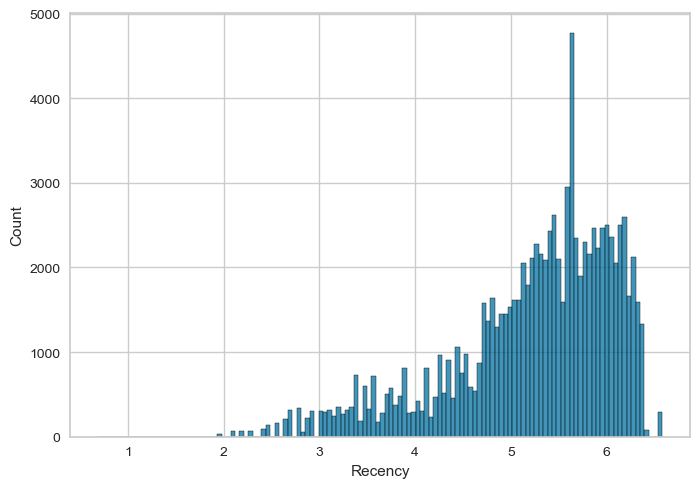

In [100]:
sns.histplot(np.log(1+rfm_plus_df['Recency']));
print(np.log(1+rfm_plus_df['Recency']).skew())

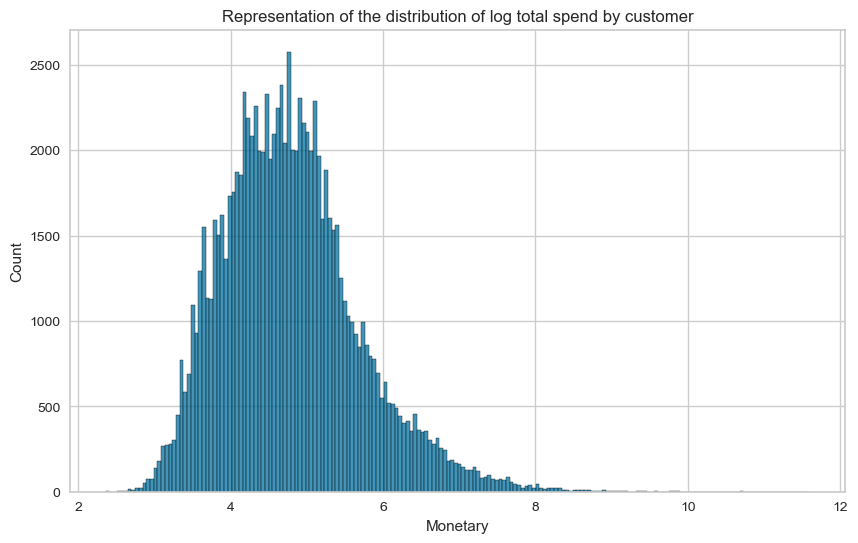

In [126]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(1+rfm_plus_df['Monetary']))
plt.title('Representation of the distribution of log total spend by customer');

Skewness :  15.306698033537087


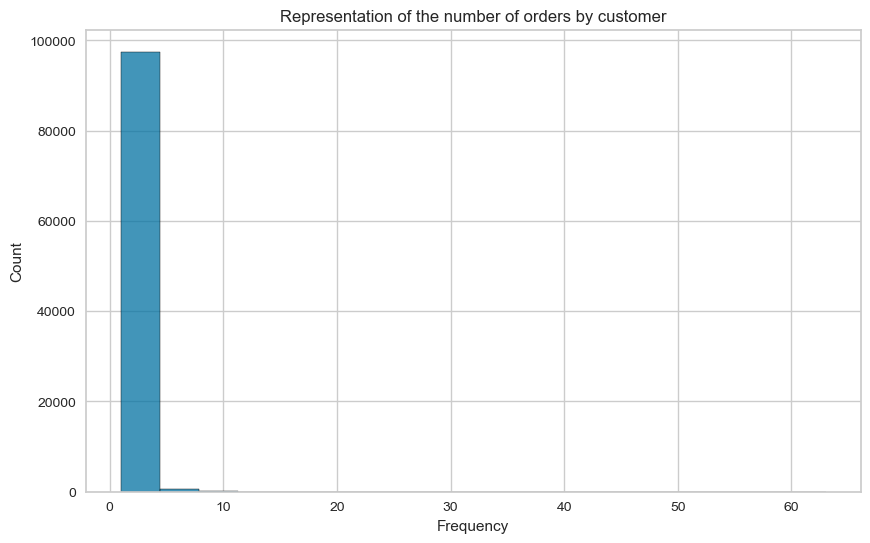

In [125]:
plt.figure(figsize=(10,6))
sns.histplot(rfm_plus_df['Frequency'])
plt.title('Representation of the number of orders by customer')
print('Skewness : ',rfm_plus_df['Frequency'].skew())

Skewness :  3.757944821539952


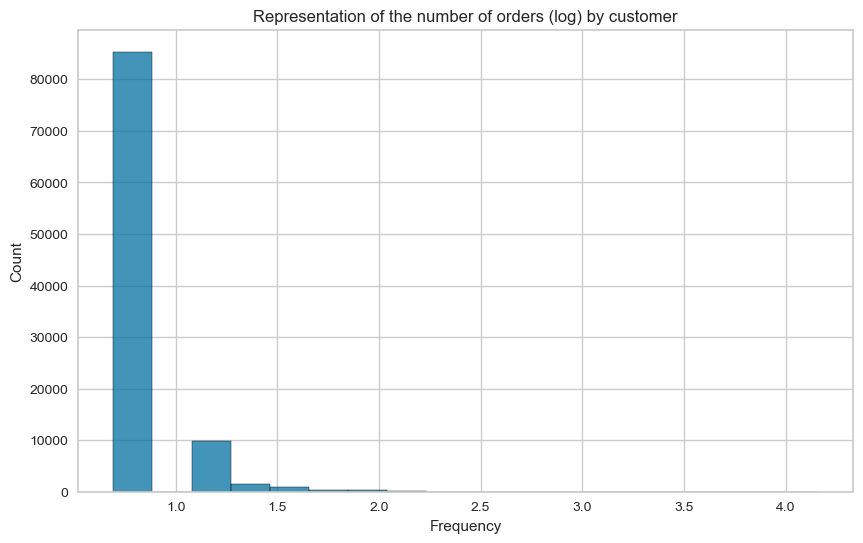

In [124]:
plt.figure(figsize=(10,6))
sns.histplot(np.log(1+rfm_plus_df['Frequency']))
plt.title('Representation of the number of orders (log) by customer')
print('Skewness : ',np.log(1+rfm_plus_df['Frequency']).skew())

In [11]:
rfm_plus_df['Frequency'] = np.log(1 + rfm_plus_df['Frequency'])

rfm_plus_df['Monetary'] = np.log(1 + rfm_plus_df['Monetary'])


#rfm_plus_df['Product_weight'] = np.log(1 + rfm_plus_df['Product_weight'])

#rfm_plus_df['Product_volume'] = np.log(1 + rfm_plus_df['Product_volume'])



# StandardScaler () => 5 clusters, en passant au log score_silhouette 0.33 => 0.26
# sans le log , groupe le plus petit 17XX clients 
# avec le log, groupe le plus petit avec 9XXX clients

# MinMaxScaler() => 3 clusters, en passant au log score_silhouette 0.40 => 0.35
# Les clusters sont séparés avec recency et review uniquement
# Les clusters sont à peu près de la même longueur

In [285]:
rfm_plus_df.head()

,Recency,Frequency,Monetary,Review,Installments
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,294,0.693147,4.751346,1.0,8.0
000161a058600d5901f007fab4c27140,415,0.693147,4.225519,4.0,5.0
0001fd6190edaaf884bcaf3d49edf079,553,0.693147,5.280255,5.0,10.0
0002414f95344307404f0ace7a26f1d5,383,0.693147,5.194899,5.0,1.0
000379cdec625522490c315e70c7a9fb,153,0.693147,4.682224,4.0,1.0


In [12]:
scaler = StandardScaler()
rfm_plus_normalized = pd.DataFrame(scaler.fit_transform(rfm_plus_df))
rfm_plus_normalized.columns = ['n_Recency', 'n_Frequency', 'n_Monetary','n_Review','n_Installments']
rfm_plus_normalized.describe()

,n_Recency,n_Frequency,n_Monetary,n_Review,n_Installments
count,9.820700e+04,9.820700e+04,9.820700e+04,9.820700e+04,9.820700e+04
mean,9.001549e-17,-3.261668e-15,-8.055473e-16,-3.614773e-16,-3.607915e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.597107e+00,-3.448455e-01,-2.699817e+00,-2.371300e+00,-1.080032e+00
25%,-8.075369e-01,-3.448455e-01,-7.034233e-01,-9.353678e-02,-7.095662e-01
50%,-1.223731e-01,-3.448455e-01,-8.742237e-02,6.657177e-01,-3.391004e-01
75%,7.128743e-01,-3.448455e-01,5.488200e-01,6.657177e-01,4.018311e-01
max,3.088109e+00,1.711177e+01,7.564066e+00,6.657177e-01,7.811147e+00


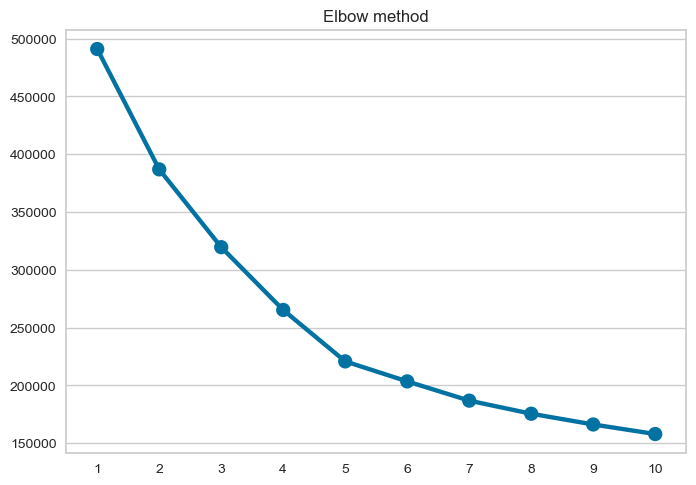

In [272]:
SSE = []
for k in range(0, 10):
    kmeans = KMeans(n_clusters = k+1, random_state = 0).fit(rfm_plus_normalized)
    SSE.append(kmeans.inertia_)
    
sns.pointplot(x = list(range(1,11)), y = SSE)
plt.title('Elbow method')
plt.show()

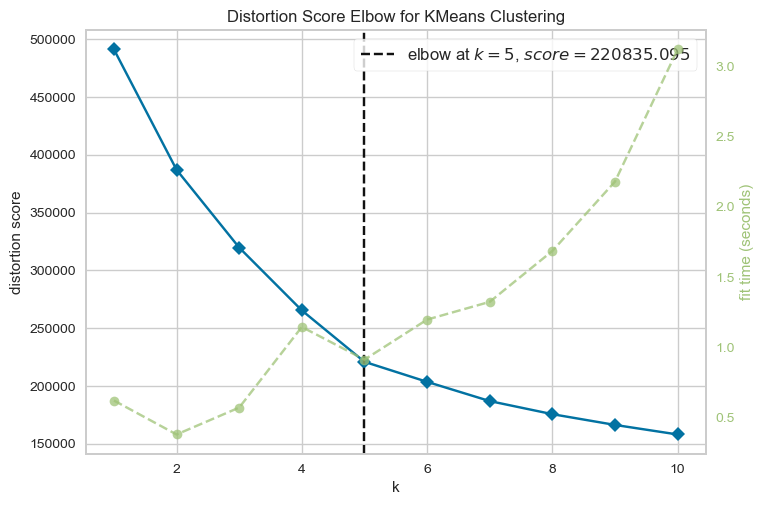

In [273]:
model = KMeans(random_state=0)

elb_visualizer = KElbowVisualizer(model, k=(1,11))
elb_visualizer.fit(rfm_plus_normalized)    
elb_visualizer.show();

In [278]:
cluster = [ 4, 5, 6 ]
for i in cluster:
    KMean = KMeans(n_clusters = i)
    KMean.fit(rfm_plus_normalized)
    label  =KMean.predict(rfm_plus_normalized)
    print(f'Silhouette Score(n={i}): {silhouette_score(rfm_plus_normalized, label)}')

Silhouette Score(n=4): 0.3488567438288093
Silhouette Score(n=5): 0.33054245592080705
Silhouette Score(n=6): 0.33143924109728823


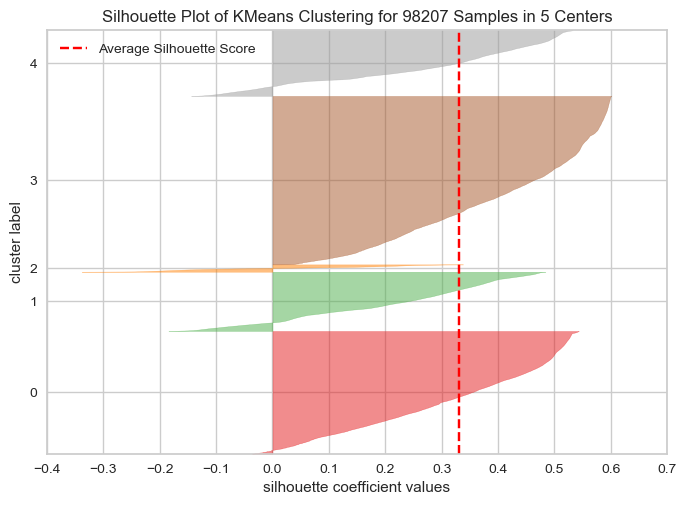

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 98207 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [279]:
visualizer = SilhouetteVisualizer(KMeans(5, random_state = 0))
visualizer.fit(rfm_plus_normalized)
visualizer.show()

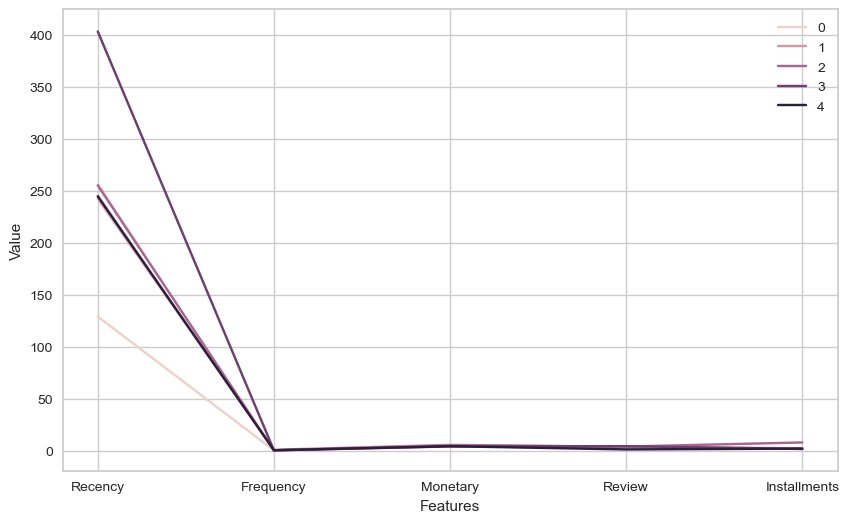

In [287]:
model = KMeans(n_clusters = 5, random_state = 0).fit(rfm_plus_normalized)
rfm_plus_ = pd.DataFrame(scaler.inverse_transform(rfm_plus_normalized))
rfm_plus_.columns = rfm_plus_df.columns
rfm_plus_['Customer Id'] = rfm_plus_df.index
rfm_plus_['Cluster'] = model.labels_

melted_rfm_normalized = pd.melt(rfm_plus_.reset_index(),
                               id_vars = ['Customer Id', 'Cluster'],
                               value_vars = ['Recency','Frequency','Monetary','Review','Installments'],
                               var_name = 'Features',
                               value_name = 'Value')

plt.figure(figsize=(10,6))
sns.lineplot('Features','Value',hue ='Cluster', data = melted_rfm_normalized)
plt.legend();

In [288]:
rfm_plus_.groupby('Cluster').agg({
    'Recency':['mean','median','min','max'],
    'Frequency':['mean','median','min','max'],
    'Monetary':['mean','median','min','max'],
    'Review':['mean','median','min','max'],
    'Installments':['mean','median','min','max','count']
})

Recency                      Frequency                      \
               mean median    min    max      mean    median       min   
Cluster                                                                  
0        129.321470  127.0    6.0  274.0  0.700234  0.693147  0.693147   
1        243.211916  225.0    6.0  719.0  1.259645  1.098612  0.693147   
2        255.579114  246.0    6.0  700.0  0.725919  0.693147  0.693147   
3        403.430999  393.0  258.0  700.0  0.705576  0.693147  0.693147   
4        244.991247  224.0    1.0  700.0  0.725568  0.693147  0.693147   

                   Monetary                                   Review         \
              max      mean    median       min        max      mean median   
Cluster                                                                       
0        1.098612  4.484090  4.474606  2.359910   7.933392  4.678779    5.0   
1        4.158883  5.990211  5.924790  2.911263  11.601976  3.870603    5.0   
2        1.386294  5.565414  5.447900  3.652734   8.843660  4.312166    5.0   
3        1.098612  4.463941  4.415461  2.404239   8.189653  4.638500    5.0   
4        1.386294  4.654672  4.641888  2.651127   7.935766  1.576926    1.0   

                  Installments                           
         min  max         mean median  min   max  count  
Cluster                                                  
0        3.0  5.0     1.837967    1.0  0.0   7.0  36218  
1        1.0  5.0     2.732940    1.5  0.0  24.0   9315  
2        1.0  5.0     8.277594    8.0  2.0  24.0  13291  
3        2.0  5.0     2.030903    1.0  1.0   8.0  26130  
4        1.0  3.0     2.353920    1.0  1.0   9.0  13253

In [289]:
rfm_plus_['Frequency'] = np.exp(rfm_plus_['Frequency']) - 1
rfm_plus_['Monetary'] = np.exp(rfm_plus_['Monetary']) - 1

#rfm_plus_['Product_weight'] = np.exp(rfm_plus_['Product_weight']) - 1
#rfm_plus_['Product_volume'] = np.exp(rfm_plus_['Product_volume']) - 1

rfm_plus_.groupby('Cluster').agg({
    'Recency':['mean','median','min','max'],
    'Frequency':['mean','median','min','max'],
    'Monetary':['mean','median','min','max'],
    'Review':['mean','median','min','max'],
    'Installments':['mean','median','min','max','count']
})

Recency                      Frequency                    \
               mean median    min    max      mean median  min   max   
Cluster                                                                
0        129.321470  127.0    6.0  274.0  1.017477    1.0  1.0   2.0   
1        243.211916  225.0    6.0  719.0  2.713795    2.0  1.0  63.0   
2        255.579114  246.0    6.0  700.0  1.080957    1.0  1.0   3.0   
3        403.430999  393.0  258.0  700.0  1.030654    1.0  1.0   2.0   
4        244.991247  224.0    1.0  700.0  1.079982    1.0  1.0   3.0   

           Monetary                              Review                   \
               mean  median    min        max      mean median  min  max   
Cluster                                                                    
0        113.224039   86.76   9.59    2787.87  4.678779    5.0  3.0  5.0   
1        703.484743  373.20  17.38  109312.64  3.870603    5.0  1.0  5.0   
2        364.728437  231.27  37.58    6929.31  4.312166    5.0  1.0  5.0   
3        111.785789   81.72  10.07    3602.47  4.638500    5.0  2.0  5.0   
4        139.051989  102.74  13.17    2794.50  1.576926    1.0  1.0  3.0   

        Installments                           
                mean median  min   max  count  
Cluster                                        
0           1.837967    1.0  0.0   7.0  36218  
1           2.732940    1.5  0.0  24.0   9315  
2           8.277594    8.0  2.0  24.0  13291  
3           2.030903    1.0  1.0   8.0  26130  
4           2.353920    1.0  1.0   9.0  13253

In [290]:
rfm_plus_.head()

,Recency,Frequency,Monetary,Review,Installments,Customer Id,Cluster
0,294.0,1.0,114.74,1.0,8.0,00012a2ce6f8dcda20d059ce98491703,4
1,415.0,1.0,67.41,4.0,5.0,000161a058600d5901f007fab4c27140,3
2,553.0,1.0,195.42,5.0,10.0,0001fd6190edaaf884bcaf3d49edf079,2
3,383.0,1.0,179.35,5.0,1.0,0002414f95344307404f0ace7a26f1d5,3
4,153.0,1.0,107.01,4.0,1.0,000379cdec625522490c315e70c7a9fb,0


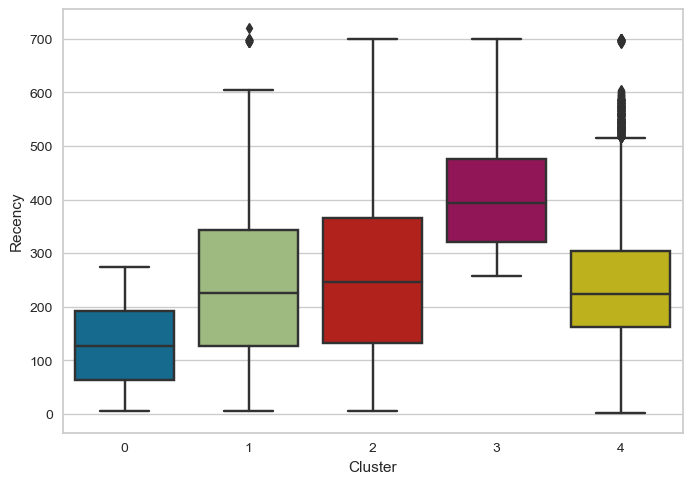

In [291]:
sns.boxplot(x  ='Cluster', y = 'Recency', data = rfm_plus_);

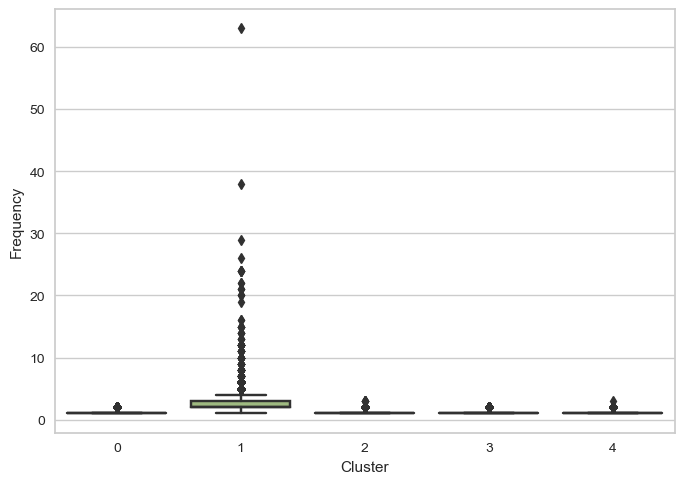

In [292]:
sns.boxplot(x  ='Cluster', y = 'Frequency', data = rfm_plus_);

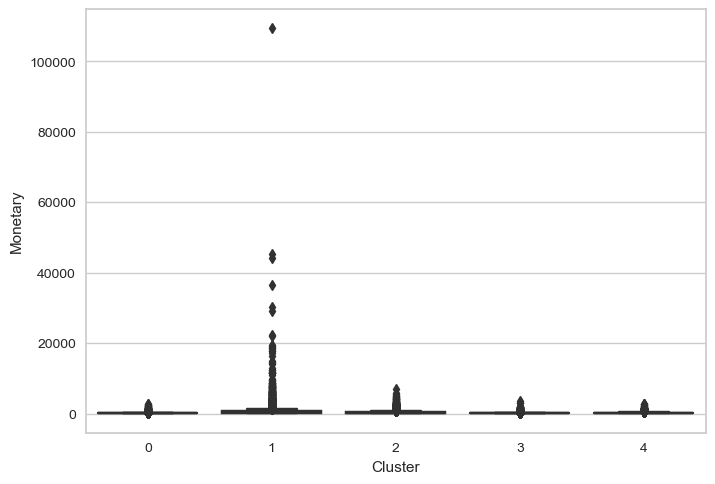

In [293]:
sns.boxplot(x  ='Cluster', y = 'Monetary', data = rfm_plus_);

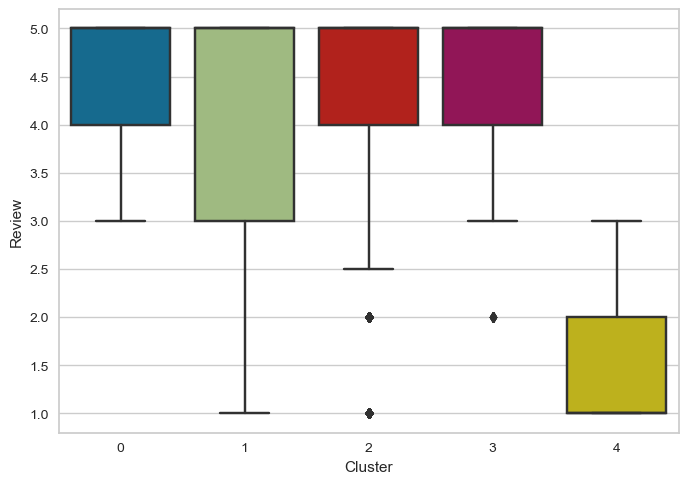

In [294]:
sns.boxplot(x  ='Cluster', y = 'Review', data = rfm_plus_);

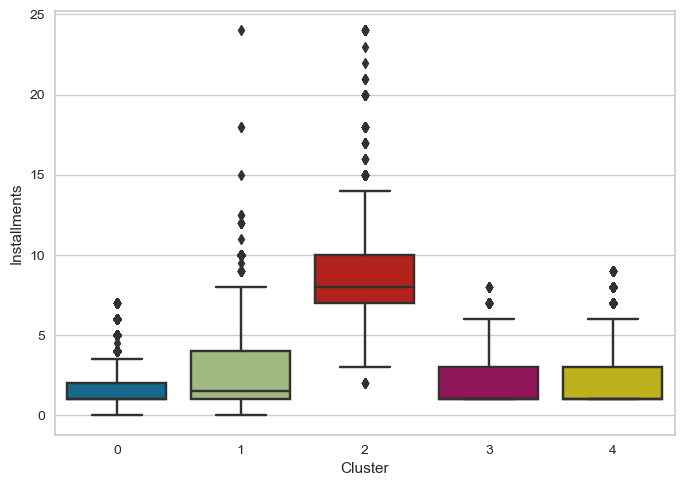

In [295]:
sns.boxplot(x  ='Cluster', y = 'Installments', data = rfm_plus_);

In [296]:
rfm_plus_.head()

,Recency,Frequency,Monetary,Review,Installments,Customer Id,Cluster
0,294.0,1.0,114.74,1.0,8.0,00012a2ce6f8dcda20d059ce98491703,4
1,415.0,1.0,67.41,4.0,5.0,000161a058600d5901f007fab4c27140,3
2,553.0,1.0,195.42,5.0,10.0,0001fd6190edaaf884bcaf3d49edf079,2
3,383.0,1.0,179.35,5.0,1.0,0002414f95344307404f0ace7a26f1d5,3
4,153.0,1.0,107.01,4.0,1.0,000379cdec625522490c315e70c7a9fb,0


In [299]:
#rename clusters

rfm_plus_.loc[rfm_plus_['Cluster']== 0,'Cluster'] = 'new_customers'
rfm_plus_.loc[rfm_plus_['Cluster']== 1,'Cluster'] = 'good_customers'
rfm_plus_.loc[rfm_plus_['Cluster']== 2,'Cluster'] = 'installments_customers'
rfm_plus_.loc[rfm_plus_['Cluster']== 3,'Cluster'] = 'former_customers'
rfm_plus_.loc[rfm_plus_['Cluster']== 4,'Cluster'] = 'bad_customers'

In [300]:
rfm_plus_.head()

,Recency,Frequency,Monetary,Review,Installments,Customer Id,Cluster
0,294.0,1.0,114.74,1.0,8.0,00012a2ce6f8dcda20d059ce98491703,bad_customers
1,415.0,1.0,67.41,4.0,5.0,000161a058600d5901f007fab4c27140,former_customers
2,553.0,1.0,195.42,5.0,10.0,0001fd6190edaaf884bcaf3d49edf079,installments_customers
3,383.0,1.0,179.35,5.0,1.0,0002414f95344307404f0ace7a26f1d5,former_customers
4,153.0,1.0,107.01,4.0,1.0,000379cdec625522490c315e70c7a9fb,new_customers


In [304]:
condition_list = [
    (rfm_plus_['Cluster']=='new_customers'),
    (rfm_plus_['Cluster']=='good_customers'),
    (rfm_plus_['Cluster']=='installments_customers'),
    (rfm_plus_['Cluster']=='former_customers'),
    (rfm_plus_['Cluster']=='bad_customers')
                ]


choice_list = ['more advertising, be active on social networks and website, customer loyalty, ask for feedback',
               'up-selling, cross-selling',
               'customer loyalty, cross-selling',
               'offer products at reduced prices, strengthen the customer relationship and build customer loyalty',
               'evolve your offer according to the competition, Offer an irreproachable quality service']


rfm_plus_['Action'] = np.select(condition_list, choice_list, default='Not Specified')

In [305]:
rfm_plus_.head()

,Recency,Frequency,Monetary,Review,Installments,Customer Id,Cluster,Action
0,294.0,1.0,114.74,1.0,8.0,00012a2ce6f8dcda20d059ce98491703,bad_customers,evolve your offer according to the competition...
1,415.0,1.0,67.41,4.0,5.0,000161a058600d5901f007fab4c27140,former_customers,"offer products at reduced prices, strengthen t..."
2,553.0,1.0,195.42,5.0,10.0,0001fd6190edaaf884bcaf3d49edf079,installments_customers,"customer loyalty, cross-selling"
3,383.0,1.0,179.35,5.0,1.0,0002414f95344307404f0ace7a26f1d5,former_customers,"offer products at reduced prices, strengthen t..."
4,153.0,1.0,107.01,4.0,1.0,000379cdec625522490c315e70c7a9fb,new_customers,"more advertising, be active on social networks..."


## RFM ++ avec  DBSCAN

In [11]:
rfm_plus_df.head()

,Recency,Frequency,Monetary,Review,Installments
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,294,1,114.74,1.0,8.0
000161a058600d5901f007fab4c27140,415,1,67.41,4.0,5.0
0001fd6190edaaf884bcaf3d49edf079,553,1,195.42,5.0,10.0
0002414f95344307404f0ace7a26f1d5,383,1,179.35,5.0,1.0
000379cdec625522490c315e70c7a9fb,153,1,107.01,4.0,1.0


In [12]:
rfm_plus_df['Frequency'] = np.log(1 + rfm_plus_df['Frequency'])

rfm_plus_df['Monetary'] = np.log(1 + rfm_plus_df['Monetary'])

rfm_plus_df.head()

,Recency,Frequency,Monetary,Review,Installments
customer_id,,,,,
00012a2ce6f8dcda20d059ce98491703,294,0.693147,4.751346,1.0,8.0
000161a058600d5901f007fab4c27140,415,0.693147,4.225519,4.0,5.0
0001fd6190edaaf884bcaf3d49edf079,553,0.693147,5.280255,5.0,10.0
0002414f95344307404f0ace7a26f1d5,383,0.693147,5.194899,5.0,1.0
000379cdec625522490c315e70c7a9fb,153,0.693147,4.682224,4.0,1.0


In [13]:
scaler = StandardScaler()
rfm_plus_normalized = pd.DataFrame(scaler.fit_transform(rfm_plus_df))
rfm_plus_normalized.columns = ['n_Recency', 'n_Frequency', 'n_Monetary','n_Review','n_Installments']
rfm_plus_normalized.describe()

,n_Recency,n_Frequency,n_Monetary,n_Review,n_Installments
count,9.820700e+04,9.820700e+04,9.820700e+04,9.820700e+04,9.820700e+04
mean,9.001549e-17,-3.261668e-15,-8.055473e-16,-3.614773e-16,-3.607915e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.597107e+00,-3.448455e-01,-2.699817e+00,-2.371300e+00,-1.080032e+00
25%,-8.075369e-01,-3.448455e-01,-7.034233e-01,-9.353678e-02,-7.095662e-01
50%,-1.223731e-01,-3.448455e-01,-8.742237e-02,6.657177e-01,-3.391004e-01
75%,7.128743e-01,-3.448455e-01,5.488200e-01,6.657177e-01,4.018311e-01
max,3.088109e+00,1.711177e+01,7.564066e+00,6.657177e-01,7.811147e+00


In [18]:
range_eps = [0.1, 0.2, 0.3, 0.4, 0.5]
for i in range_eps:
    print('eps_value : '+ str(i))
    db = DBSCAN (eps = i, min_samples = 100).fit(rfm_plus_normalized)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(rfm_plus_normalized, labels)
    print('For eps value :'+ str(i), labels,
         'The average silhouette_score is :', silhouette_avg)

eps_value : 0.1
{0, 1, -1}
For eps value :0.1 [-1 -1 -1 ... -1 -1 -1] The average silhouette_score is : -0.19076798746540127
eps_value : 0.2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, -1}
For eps value :0.2 [-1 -1 -1 ... -1  3 -1] The average silhouette_score is : -0.38968016595318483
eps_value : 0.3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, -1}
For eps value :0.3 [-1 -1 -1 ... -1  4 -1] The average silhouette_score is : -0.25972017727661695
eps_value : 0.4
{0, 1, 2, 3, 4, 5, 6, -1}
For eps value :0.4 [-1 -1  0 ...  1  0 -1] The average silhouette_score is : -0.0670394006522324
eps_value : 0.5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -1}
For eps value :0.5 [-1  0  1 ...  0  1 -1] The average silhouette_score is : -0.0411726965817219


In [19]:
range_eps = [0.6, 0.7, 0.8, 0.9, 1]
for i in range_eps:
    print('eps_value : '+ str(i))
    db = DBSCAN (eps = i, min_samples = 100).fit(rfm_plus_normalized)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = silhouette_score(rfm_plus_normalized, labels)
    print('For eps value :'+ str(i), labels,
         'The average silhouette_score is :', silhouette_avg)

eps_value : 0.6
{0, 1, 2, 3, 4, 5, 6, -1}
For eps value :0.6 [2 0 1 ... 0 1 4] The average silhouette_score is : 0.037959260000989085
eps_value : 0.7
{0, 1, 2, 3, 4, 5, 6, 7, -1}
For eps value :0.7 [0 1 2 ... 1 2 4] The average silhouette_score is : 0.014212900559276674
eps_value : 0.8
{0, 1, 2, -1}
For eps value :0.8 [0 0 0 ... 0 0 1] The average silhouette_score is : 0.24055320647710562
eps_value : 0.9
{0, 1, 2, 3, -1}
For eps value :0.9 [0 0 0 ... 0 0 1] The average silhouette_score is : 0.2450874153409391
eps_value : 1
{0, 1, 2, 3, -1}
For eps value :1 [0 0 0 ... 0 0 1] The average silhouette_score is : 0.2528004305388662


In [25]:
db = DBSCAN(eps = 1, min_samples = 100).fit(rfm_plus_normalized)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(set(labels))

n_clusters_ = len(set(labels))
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters : %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

{0, 1, 2, 3, -1}
Estimated number of clusters : 5
Estimated number of noise points: 2620


In [29]:
unique, counts = np.unique(labels, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   -1  2620]
 [    0 85169]
 [    1  9531]
 [    2   240]
 [    3   647]]


# RFM ++ avec  agglomerative clustering

In [13]:
rfm_plus_normalized.head()

,n_Recency,n_Frequency,n_Monetary,n_Review,n_Installments
0,0.314827,-0.344845,-0.043980,-2.371300,1.883694
1,1.104396,-0.344845,-0.627944,-0.093537,0.772297
2,2.004898,-0.344845,0.543405,0.665718,2.624626
3,0.895585,-0.344845,0.448613,0.665718,-0.709566
4,-0.605250,-0.344845,-0.120745,-0.093537,-0.709566


In [34]:
pca = PCA()
pca.fit(rfm_plus_normalized)

print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[1.62453305 1.02884584 1.0015207  0.91691026 0.42824108]
[0.3249033  0.20576707 0.2003021  0.18338018 0.08564734]


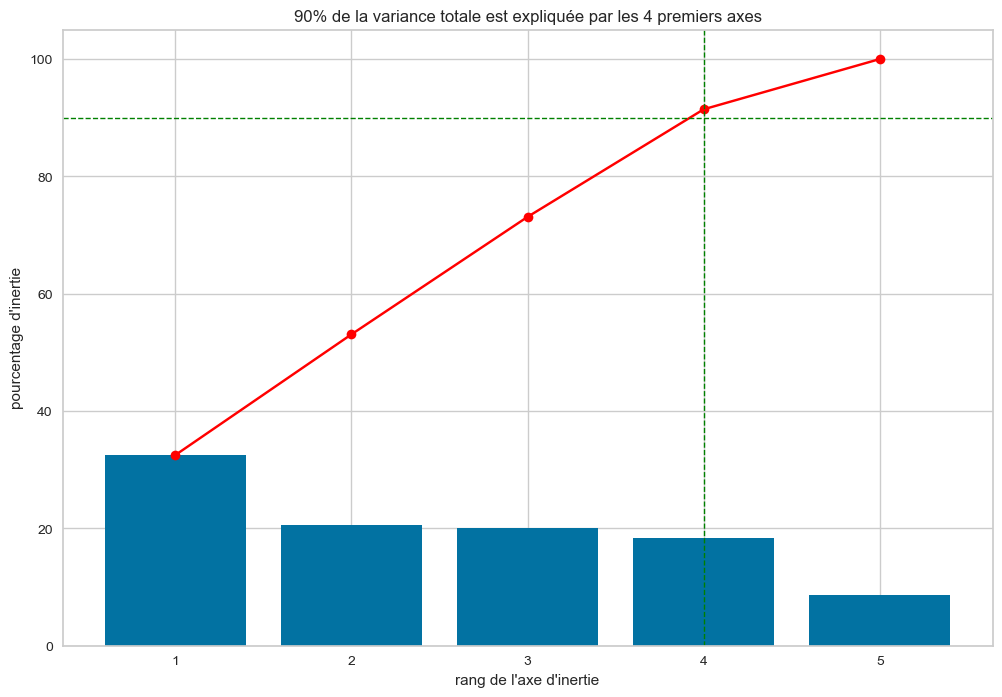

In [35]:
# Explained variance
pca = PCA()
pca.fit(rfm_plus_normalized)
varexpl = pca.explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c="red",marker='o')
plt.axhline(y=90, linestyle="--", 
            color="green",
            linewidth=1)

limit = 90
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans, linestyle="--", 
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"\
          " par les {} premiers axes".format(limit,
                                            min_plans))
plt.show(block=False)

In [36]:
#Réduire la dimensionnalité des Données

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(rfm_plus_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

In [38]:
 X_train, X_test,  = train_test_split(
                     X_principal,  test_size=0.8, random_state=0)

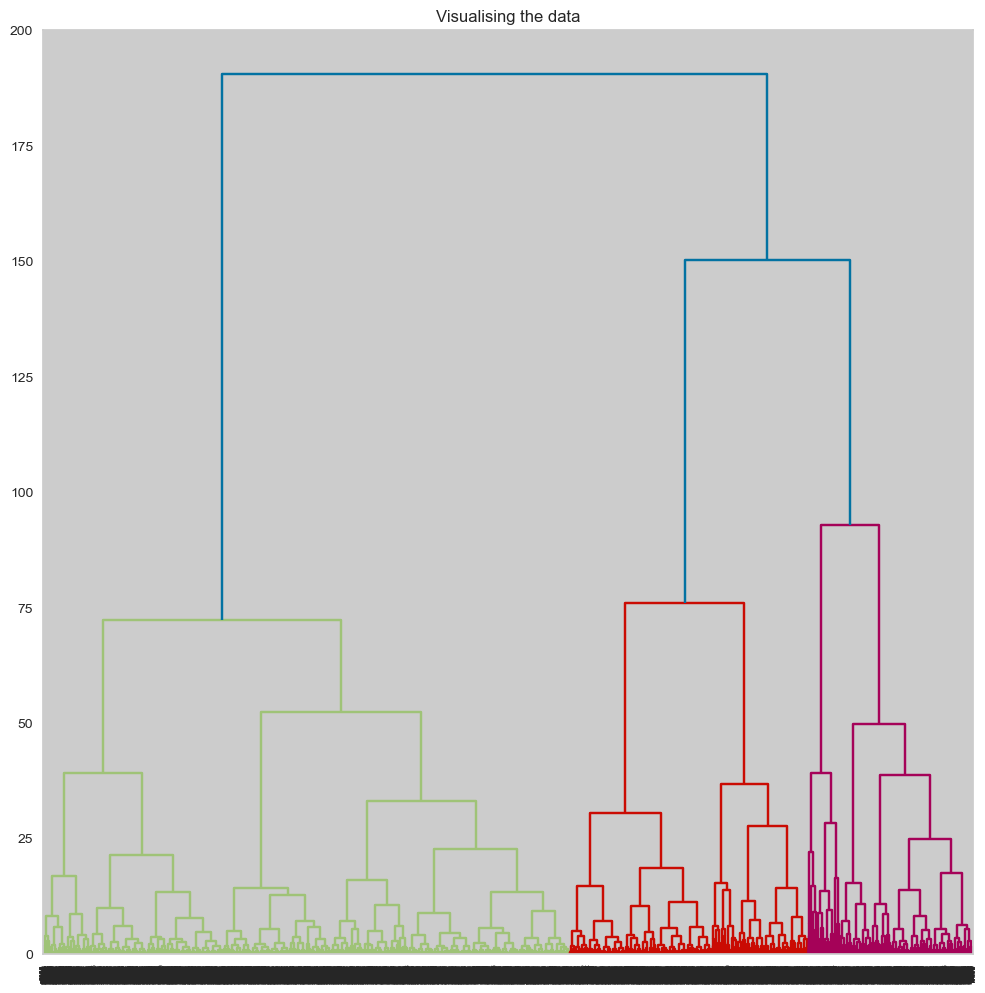

In [41]:
# Visualizing the working of the Dendograms

plt.figure(figsize =(12, 12))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_train, method ='ward')))

In [42]:
y_train, y_test,  = train_test_split(
                     X_principal,  test_size=0.2, random_state=0)

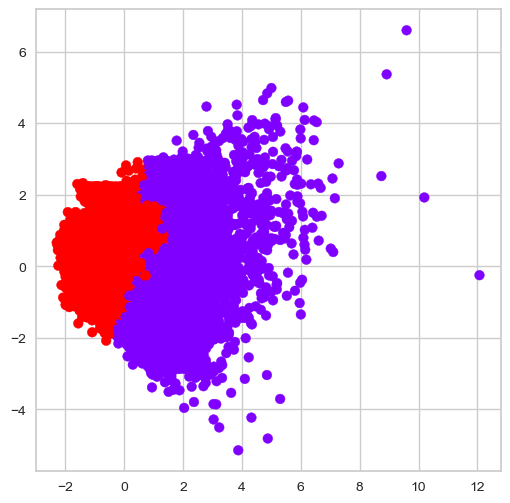

In [43]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac2.fit_predict(y_test), cmap ='rainbow')
plt.show()

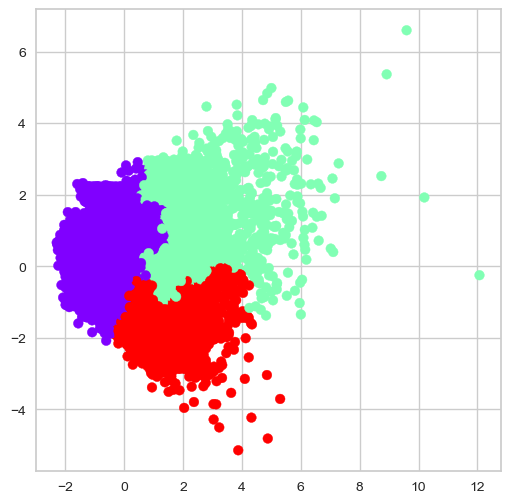

In [44]:
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac3.fit_predict(y_test), cmap ='rainbow')
plt.show()

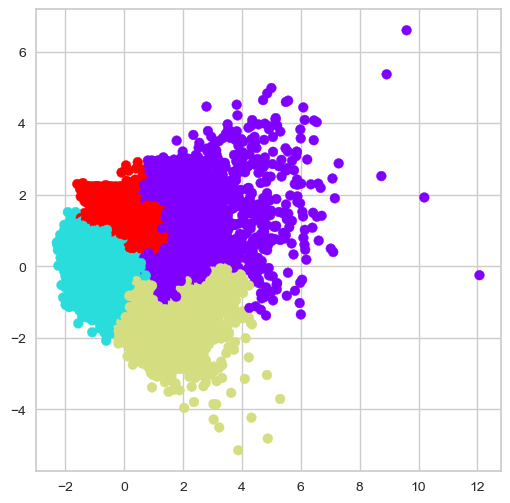

In [45]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac4.fit_predict(y_test), cmap ='rainbow')
plt.show()

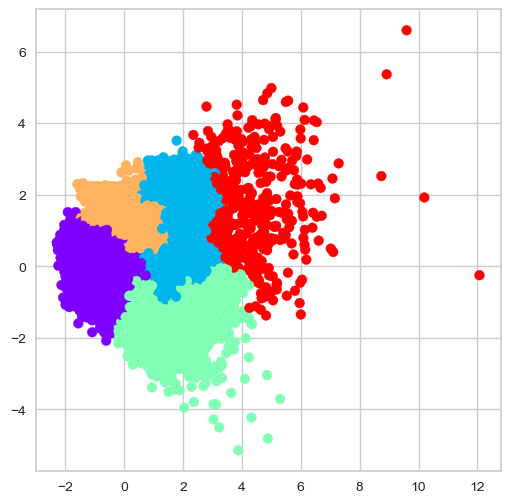

In [47]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac5.fit_predict(y_test), cmap ='rainbow')
plt.show()

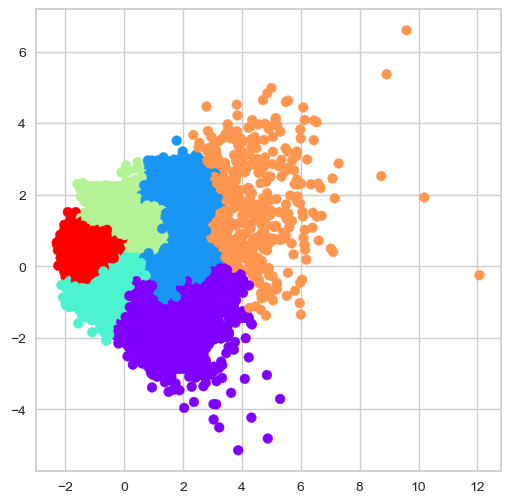

In [46]:
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac6.fit_predict(y_test), cmap ='rainbow')
plt.show()

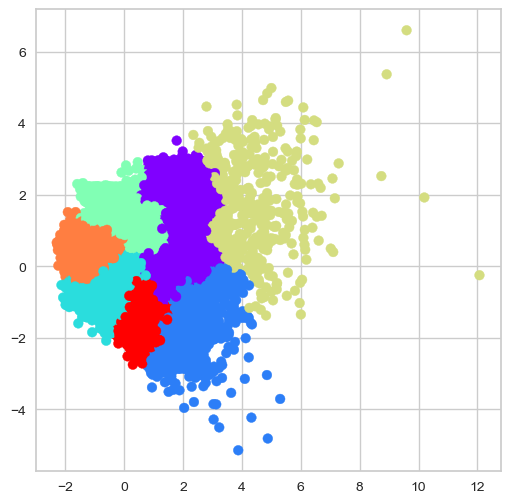

In [48]:
ac7 = AgglomerativeClustering(n_clusters = 7)
  
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac7.fit_predict(y_test), cmap ='rainbow')
plt.show()

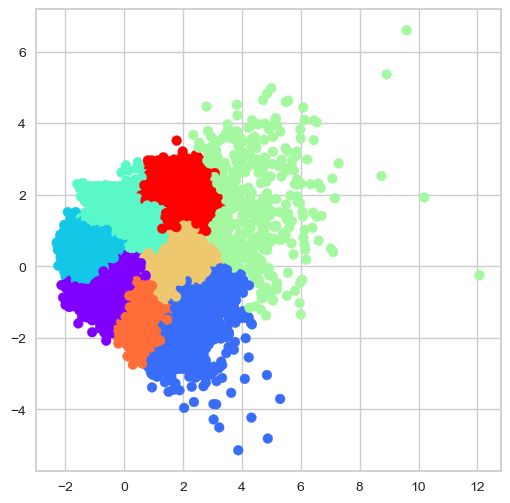

In [51]:
ac8 = AgglomerativeClustering(n_clusters = 8)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac8.fit_predict(y_test), cmap ='rainbow')
plt.show()

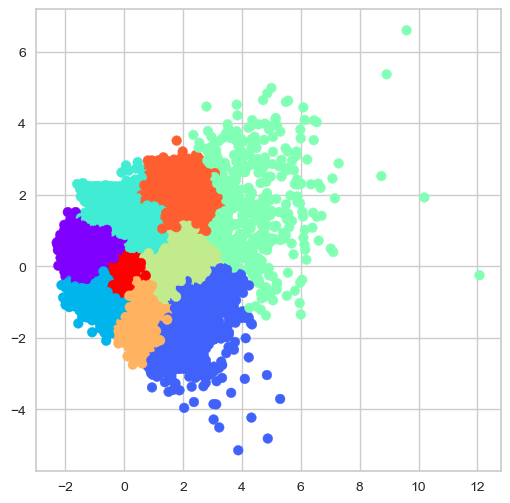

In [53]:
ac9 = AgglomerativeClustering(n_clusters = 9)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(y_test['P1'], y_test['P2'],
            c = ac9.fit_predict(y_test), cmap ='rainbow')
plt.show()

In [54]:
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(y_test, ac2.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac3.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac4.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac5.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac6.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac7.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac8.fit_predict(y_test)))
silhouette_scores.append(
        silhouette_score(y_test, ac9.fit_predict(y_test)))

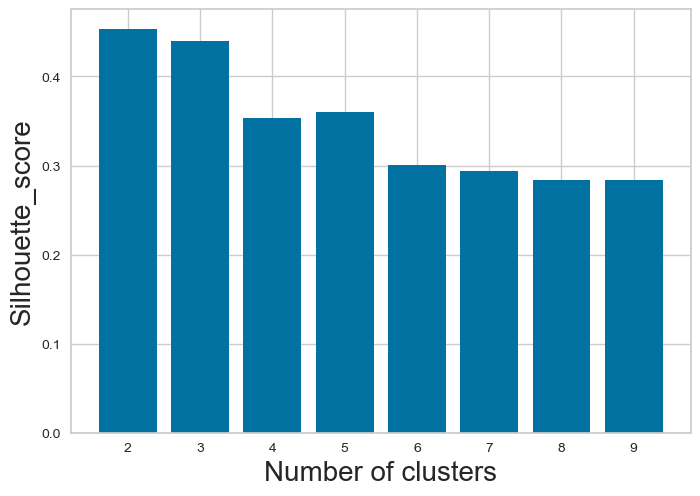

In [60]:
# Plotting a bar graph to compare the results
k = [2, 3, 4, 5, 6, 7, 8, 9]
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Silhouette_score', fontsize = 20)
plt.show()



In [61]:
Xbis_train,Xbis_test   = train_test_split(
                     rfm_plus_normalized,  test_size=0.8, random_state=0)


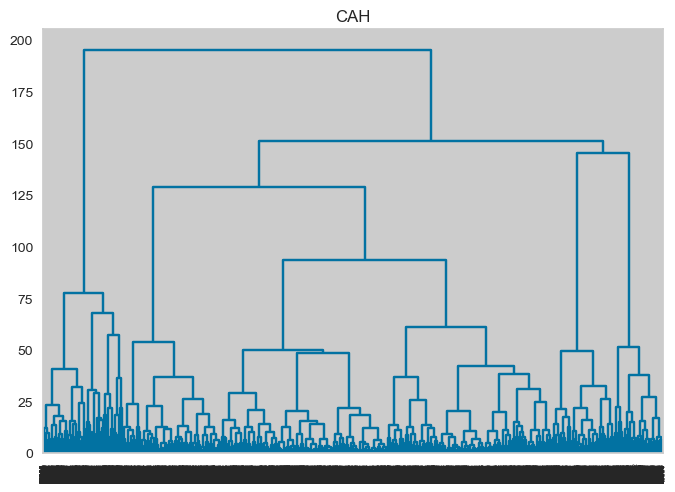

In [62]:
Z = linkage(Xbis_train,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=0)
plt.show()

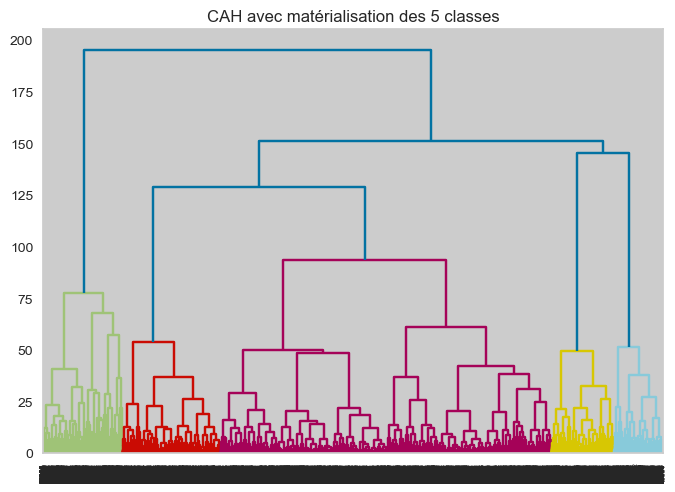

[4 2 3 ... 3 3 2]
        0
1   70634
1   28292
1   35713
1   16000
1   37289
..    ...
5     485
5   92961
5   41706
5   62338
5   87578

[19641 rows x 1 columns]


In [66]:
#matérialisation des 5 classes 
plt.title('CAH avec matérialisation des 5 classes')
dendrogram(Z,labels=Xbis_train.index,orientation='top',color_threshold=100)
plt.show()
#découpage à la hauteur t = 100==> identifiants de 5 groupes obtenus
groupes_cah = fcluster(Z,t=100,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pd.DataFrame(X_train.index[idg],groupes_cah[idg]))

# Conclusion